<a href="https://colab.research.google.com/github/JuliaPenalva/Meus-Projetos/blob/main/Pre%C3%A7os_de_Casas_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
df_sample = pd.read_csv("/content/drive/MyDrive/Awari/Preços de Casas/sample_submission.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Awari/Preços de Casas/test.csv")
df_train = pd.read_csv("/content/drive/MyDrive/Awari/Preços de Casas/train.csv")

In [ ]:
df = df_train.append(df_test)
del df["SalePrice"]
SalePrice = df_sample["SalePrice"]
df["SalePrice"] = SalePrice
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,...,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,169277.052498
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,...,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,187758.393989
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,...,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,183583.683570
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,...,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,179317.477511
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,...,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,...,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,...,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,...,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400
1457,2918,85,

In [ ]:
print(f"Tamanho da base de dados: {df.shape[1]} colunas e {df.shape[0]} linhas")

Tamanho da base de dados: 81 colunas e 2919 linhas


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [ ]:
df.describe(exclude='object')
#LotFrontage = Pés lineares de rua conectada a propriedade
#MasVnrArea = Área de folheado de alvenaria, em pés²
#BsmtFinSF1 = Pés² finalizados do porão de tipo 1
#BsmtFinSF2 = Pés² finalizados do porão de tipo 2
#BsmtUnfSF = Pés² da área não finalizada do porão 
#TotalBsmtSF = Pés² totais do porão
#BsmtFullBath	= Banheiros completos no porão
#BsmtHalfBath	= "Meios-banheiro" no porão
#GarageYrBlt = Ano em que a garagem foi construida 
#GarageCars = Tamanho da garagem, medida em carros
#GarageArea = Área da garagem em pés²
#SalePrice = Preço de venda da casa

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.040942,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,179183.918243
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.206206,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,16515.471423
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,135751.318893
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,168696.541746
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,179208.665698
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,186804.010062
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2010.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,281643.976117


In [ ]:
df["GarageYrBlt"].sort_values(ascending = False)

1132    2207.0
378     2010.0
148     2010.0
819     2010.0
987     2010.0
         ...  
1433       NaN
1449       NaN
1453       NaN
1454       NaN
1457       NaN
Name: GarageYrBlt, Length: 2919, dtype: float64

In [ ]:
df["GarageYrBlt"].replace(to_replace = 2207, value = 2007, inplace = True)

In [ ]:
df["GarageYrBlt"].sort_values(ascending = False)

42      2010.0
378     2010.0
148     2010.0
819     2010.0
987     2010.0
         ...  
1433       NaN
1449       NaN
1453       NaN
1454       NaN
1457       NaN
Name: GarageYrBlt, Length: 2919, dtype: float64

In [ ]:
df.describe(include='object')
#MSZoning = Classificação de zoneamento da venda (RL = residencial de baixa densidade)
#Street = Tipo de rua que dá acesso a propriedade (Pave = pavimentada)
#Alley = Tipo de beco que dá acesso a propriedade (Grvl = cascalho)
#LotShape = Formato geral do lote (Reg = regular)
#LandContour = Planicidade da propriedade (Lvl = quase plana ou nivelada)
#Utilities = Tipo de utilidade disponível (AllPub = Todas as utilidades, eletricidade, gás e água)
#LotConfig = Configuração do lote (Inside = lote interno)
#LandSlope = Inclinação da propriedade (Glt = levemente inclinada)
#Neighborhood = Localização dentro da cidade de Ames (NAmes = Norte de Ames)
#Condition1 = Condição de proximidade com ruas, avenidas, etc (Norm = normal)
#Condition2 = Condição de proximidade com ruas, avenidas, etc se mais de uma estiver presente (Norm = normal)
#BldgType = Tipo de habitação (1Fam = uma família desanexado)
#HouseStyle = Estilo da habitação (1Story = um lote)
#RoofStyle = Tipo de telhado (Gable = duas águas)
#RoofMatl = Material do telhado (CompShg = telha padrão de composto)
#Exterior1st = Exterior cobrindo a casa (VinylSd = tapume de vinil)
#Exterior2nd = Exterior cobrindo a casa, se mais de um material (VinylSd = tapume de vinil)
#MasVnrType = Tipo de folheado de alvenaria (None = nenhum)
#ExterQual = Qualidade do material do exterior (TA = normal)
#ExterCond = Condição do material no exterior (TA = normal)
#Foundation = Tipo de fundação (PConc = concreto derramado)
#BsmtQual = Altura do porão (TA = normal, entre 80 e 89 polegadas)
#BsmtCond = Condição geral do porão (TA = normal) 
#BsmtExposure = saídas externas ou paredes no nível do jardim (No = sem saídas externas)
#BsmtFinType1 = Avaliação da área finalizada do porão (Unf = não finalizada)
#Exterior1s2 = Avaliação da área finalizada do porão, se mais de uma avaliação (Unf = não finalizada)
#Heating = Tipo de aquecimento (GasA = forno de ar quente à gás)
#HeationQC = Qualidade ou condição do aquecimento (Ex = Excelente)
#CentralAir = Condicionamento de ar central (Y = sim)
#Electrical = Sistema elétrico (SBkrk = Dijuntores padrão e Romex)
#KitchenQual = Qualidade da cozinha (TA = normal)
#Functional =  Funcionalidade da casa (Typ = normal)
#FireplaceQu = Qualidade da lareira (Gd = boa no nível principal da casa)
#GarageType = Localização da garagem (Attchd = anexada a casa)
#GarageFinish = Finalização do interior da garagem (Unf = não finalizada)
#GarageQual = Qualidade da garagem (TA = normal)
#GarageCond = Condição da garagem (TA = normal)
#PavedDrive = Caminho pavimentado (Y = sim)
#PoolQC = Qualidade da piscina (Ex = excelente)
#Fence = Qualidade da cerca (MnPrv = privacidade mínima)
#MiscFeature = Outras comodidades não abordadas (Shed = cabana com mais de 100 pés²)
#SaleType = Tipo de venda (WD = escritura garantida, convencional)
#SaleCondition = Condição da venda (Normal = venda normal)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2915,2919,198,2919,2919,2917,2919,2919,2919,2919,2919,2919,2919,2919,2919,2918,2918,2895,2919,2919,2919,2838,2837,2837,2840,2839,2919,2919,2919,2918,2918,2917,1499,2762,2760,2760,2760,2919,10,571,105,2918,2919
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,2265,2907,120,1859,2622,2916,2133,2778,443,2511,2889,2425,1471,2310,2876,1025,1014,1742,1798,2538,1308,1283,2606,1904,851,2493,2874,1493,2723,2671,1492,2717,744,1723,1230,2604,2654,2641,4,329,95,2525,2402


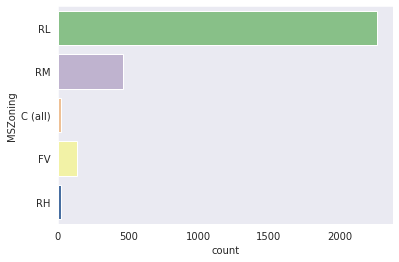

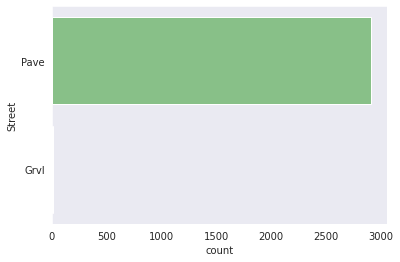

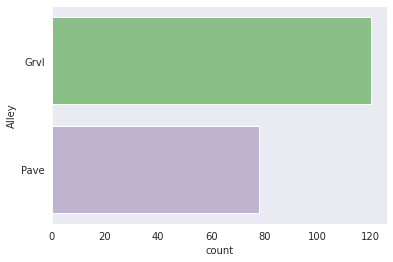

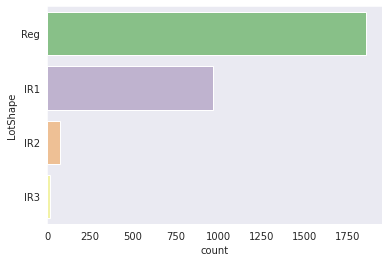

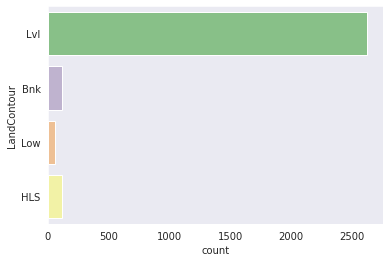

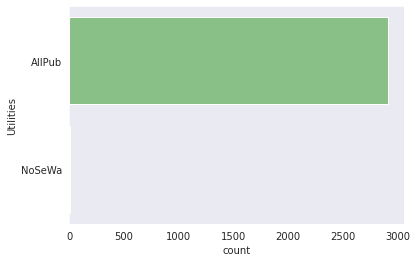

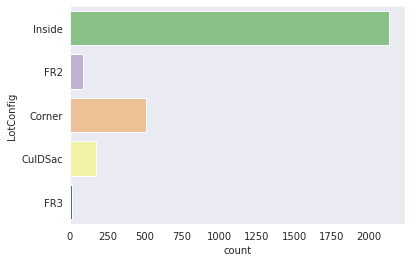

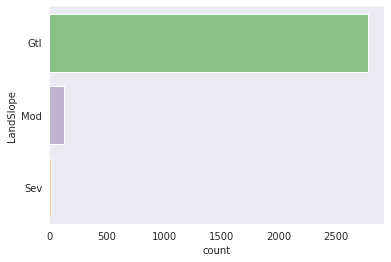

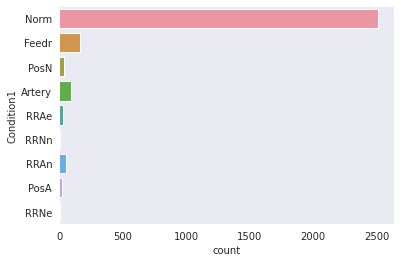

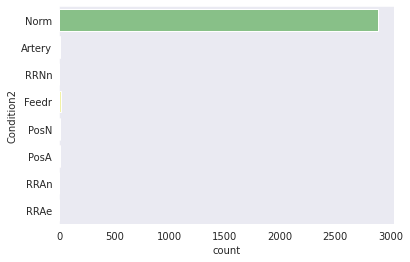

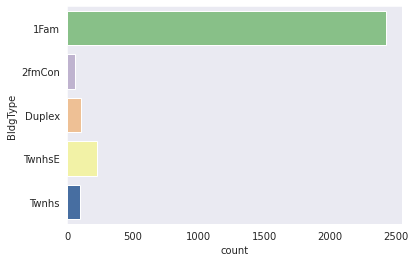

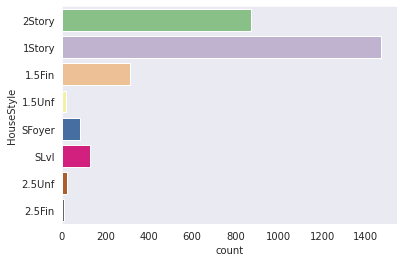

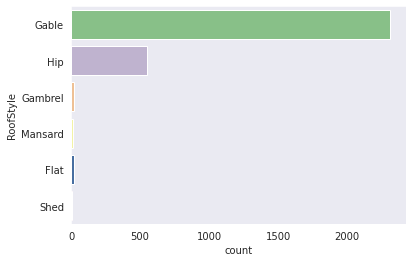

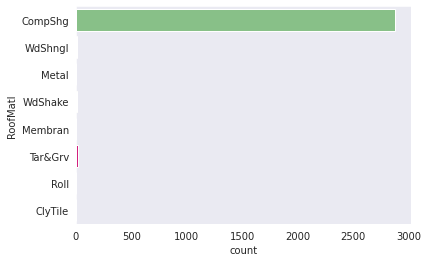

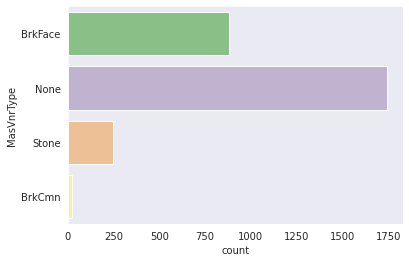

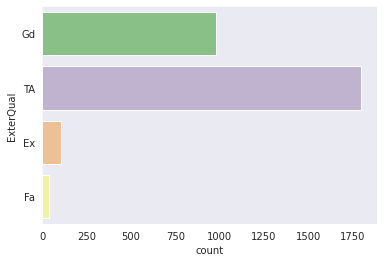

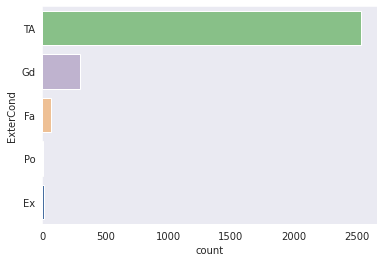

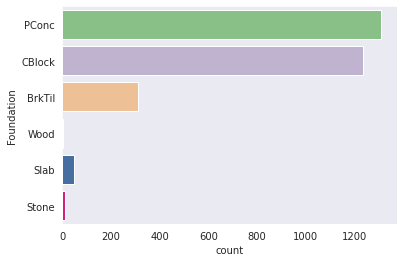

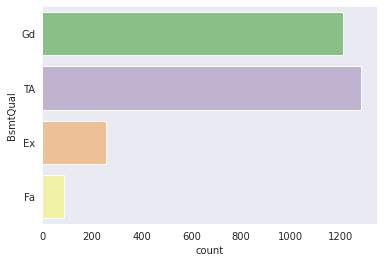

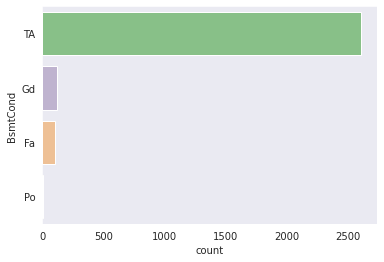

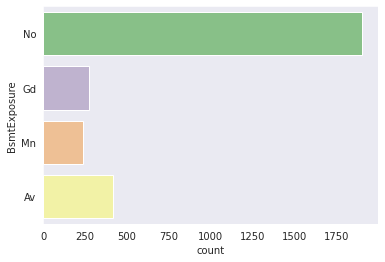

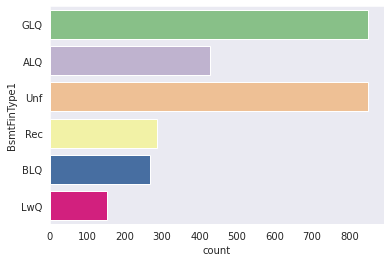

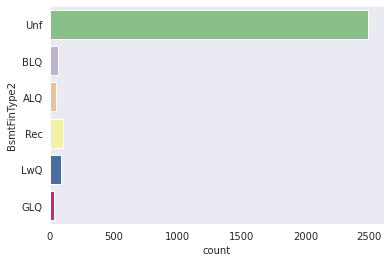

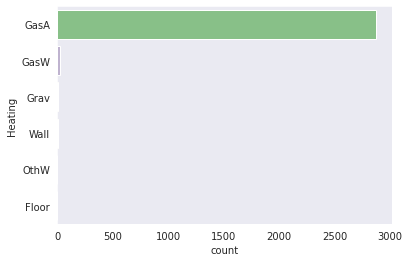

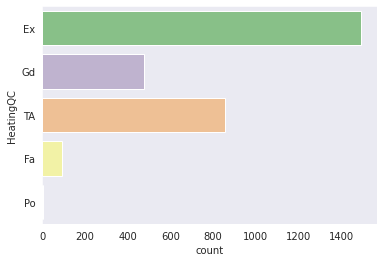

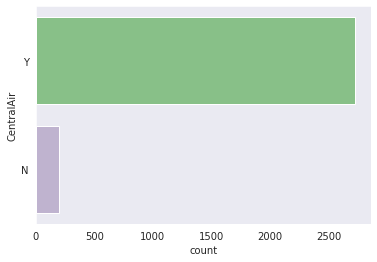

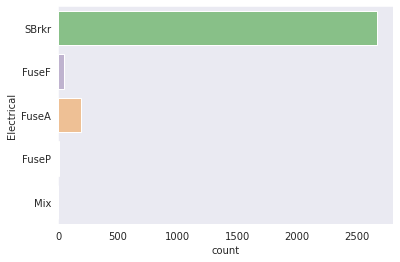

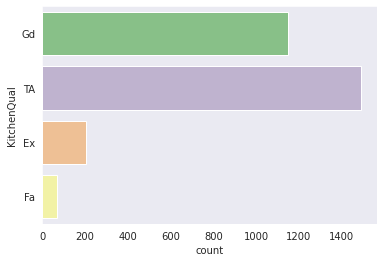

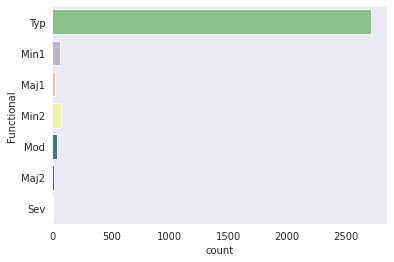

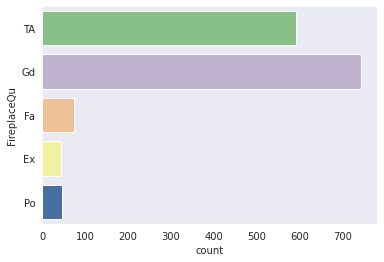

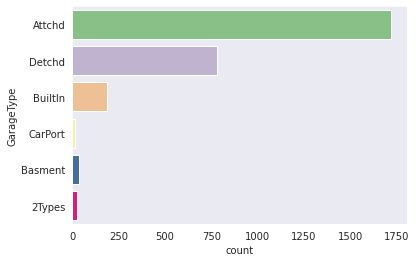

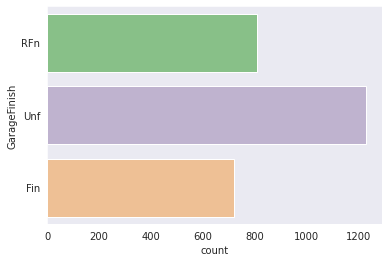

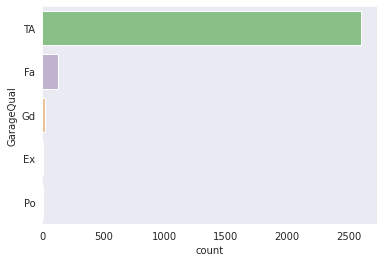

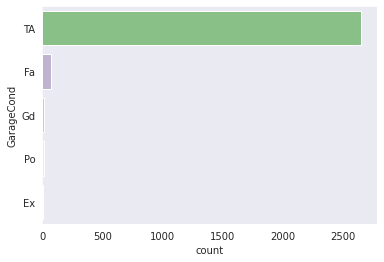

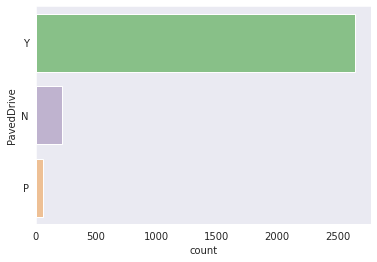

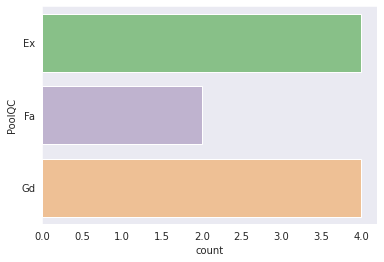

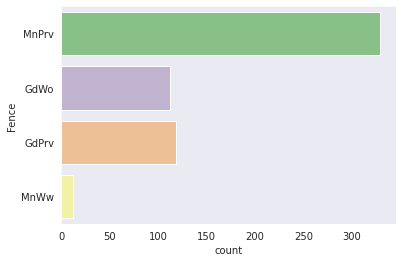

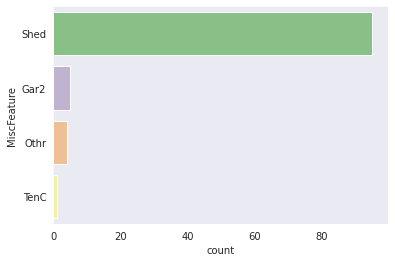

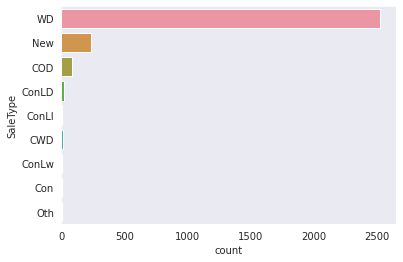

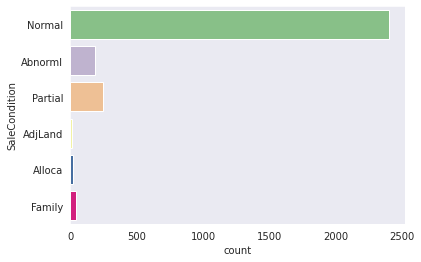

In [ ]:
sns.set_style('dark')
sns.set_palette("Accent")
for column in df.select_dtypes(include='object'):
  if df[column].nunique() < 10:
    sns.countplot(y=column, data = df)
    plt.show()

In [ ]:
df["MSZoning"].unique()

array(['RL', 'RM', 'C (all)', 'FV', 'RH', nan], dtype=object)

In [ ]:
df = df[df.MSZoning != 'C (all)'] #retirar imóveis comerciais da amostra, deixando apenas residenciais

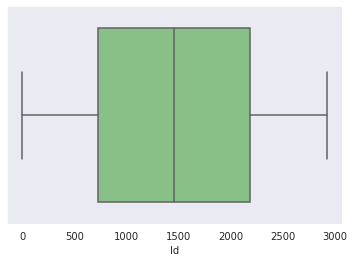

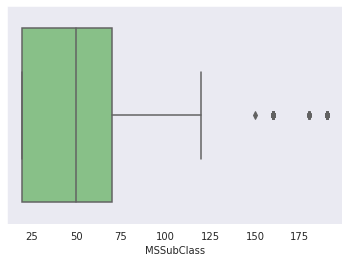

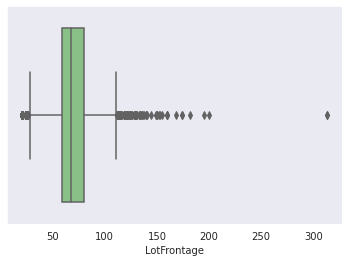

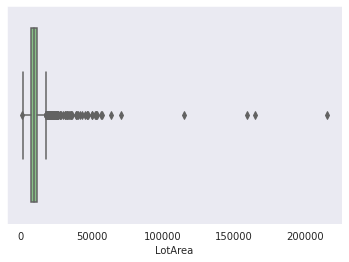

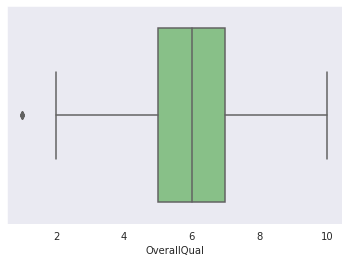

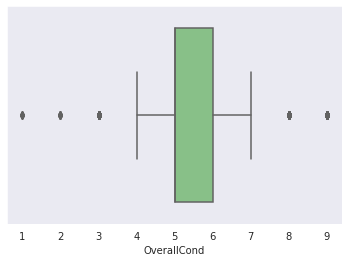

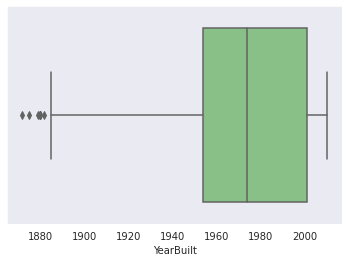

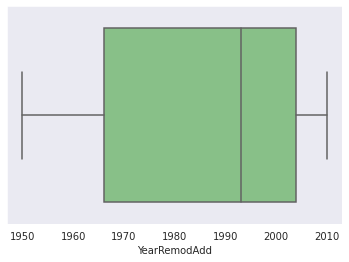

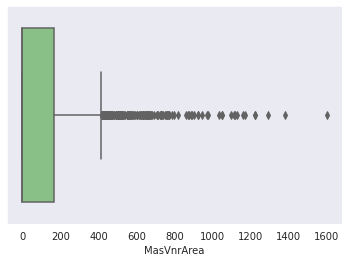

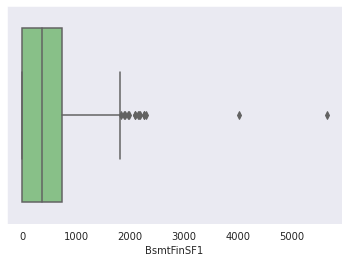

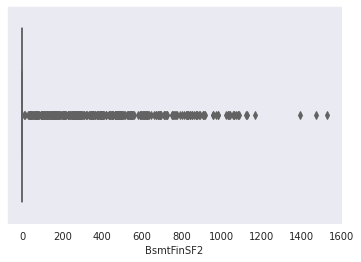

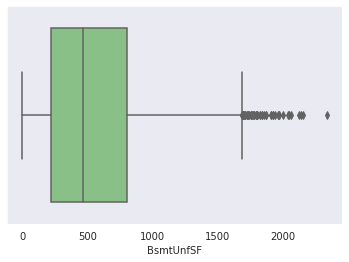

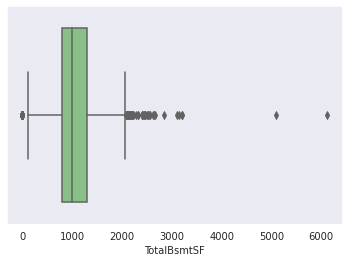

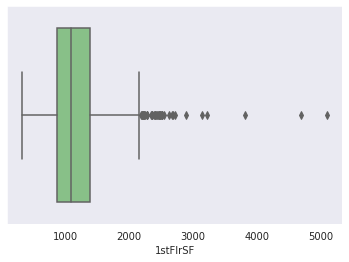

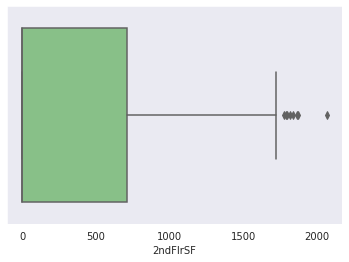

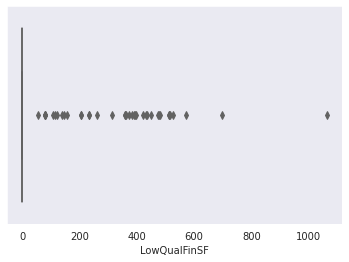

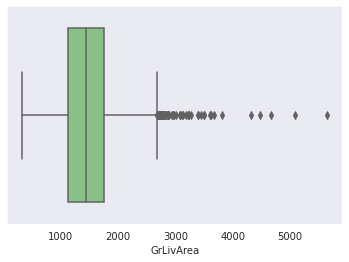

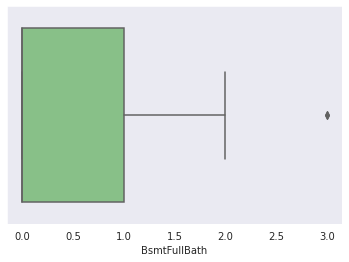

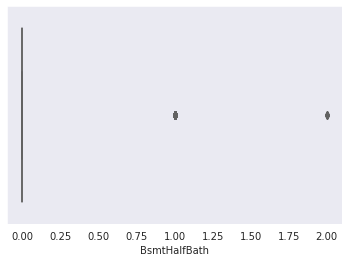

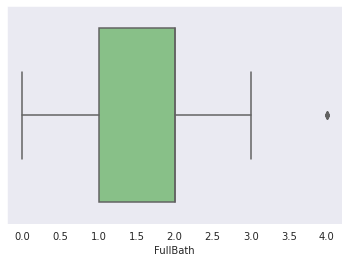

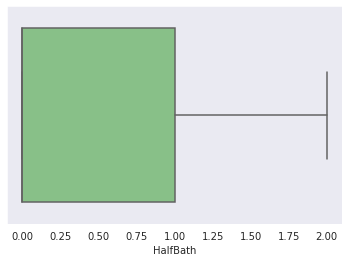

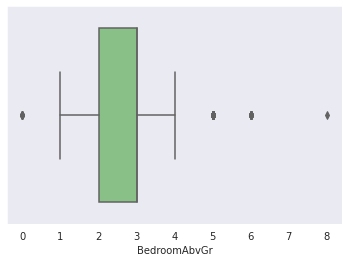

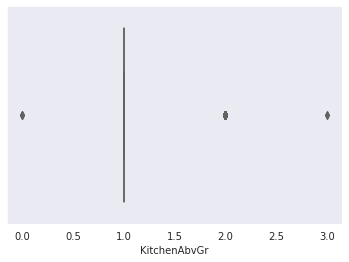

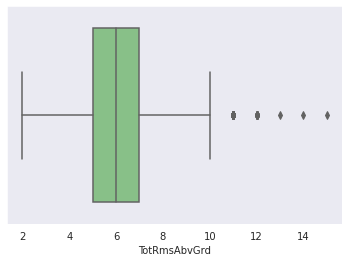

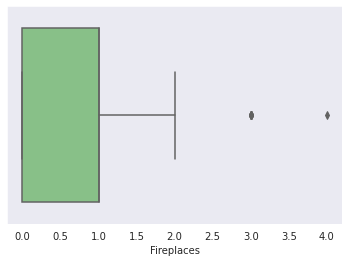

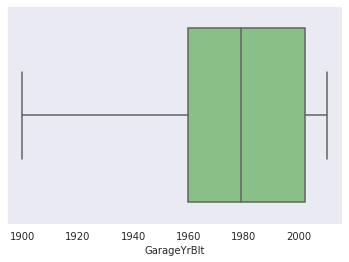

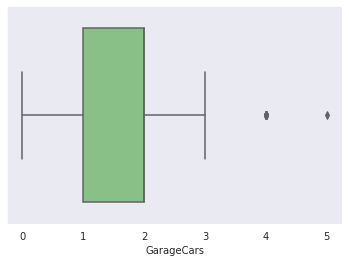

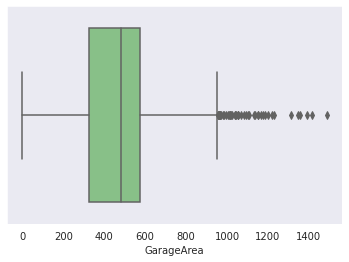

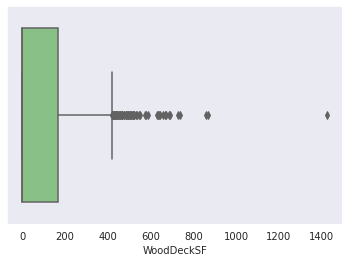

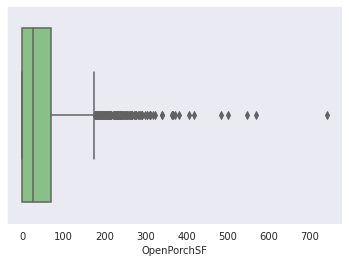

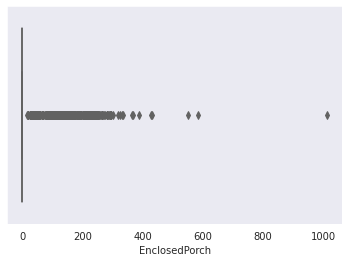

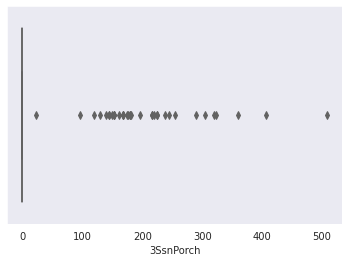

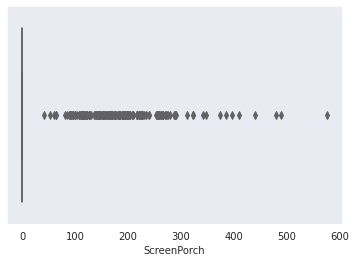

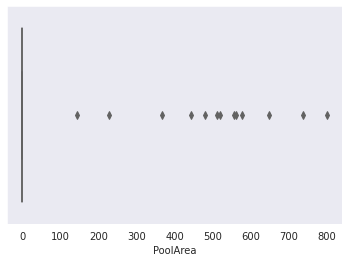

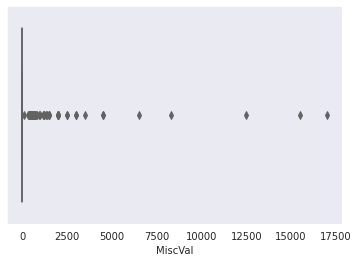

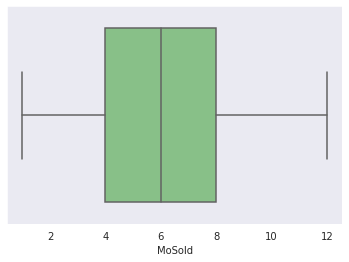

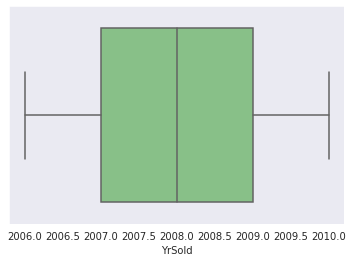

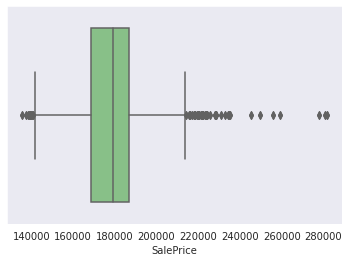

In [ ]:
for column in df.select_dtypes(exclude='object'):
    sns.boxplot(x=column, data = df)
    plt.show()

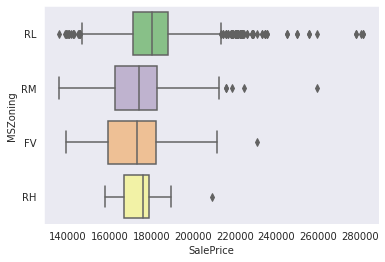

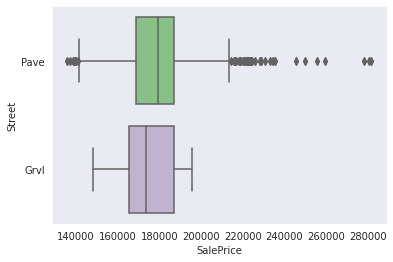

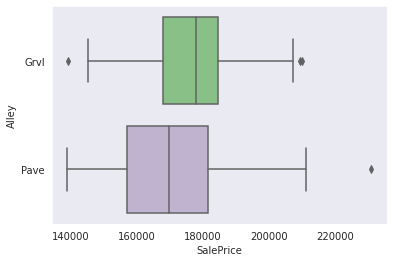

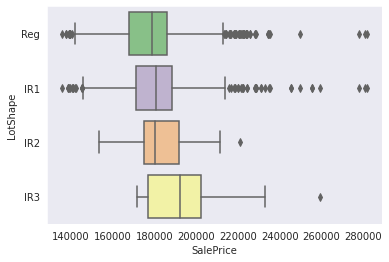

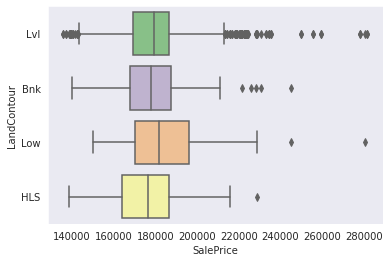

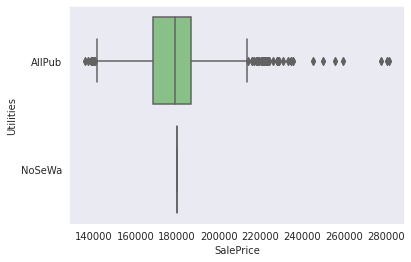

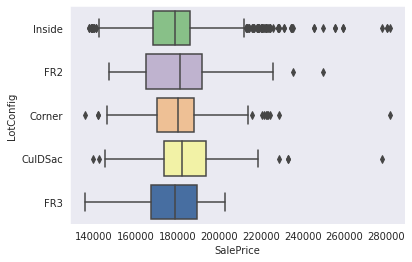

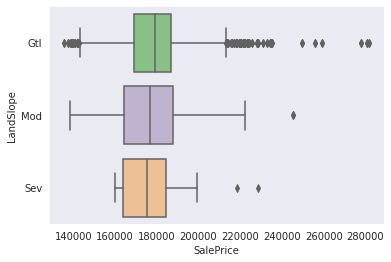

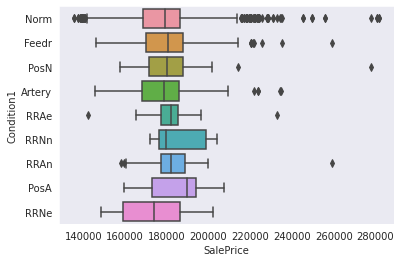

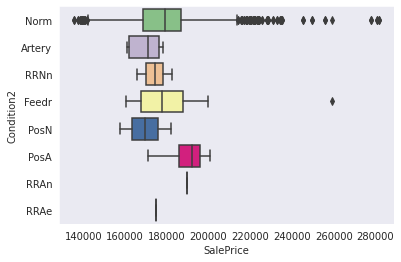

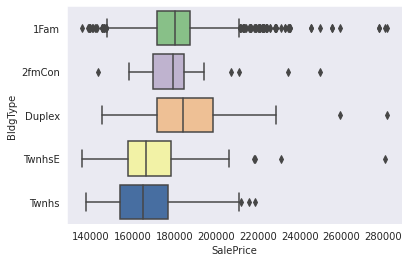

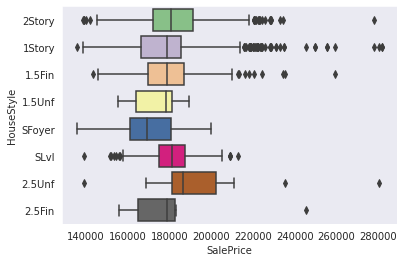

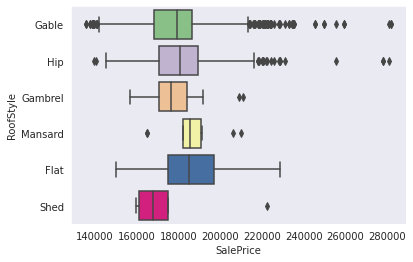

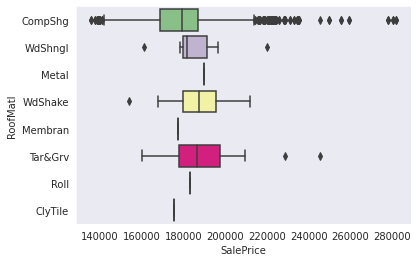

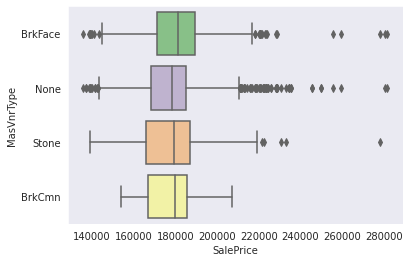

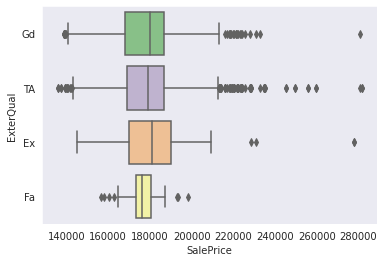

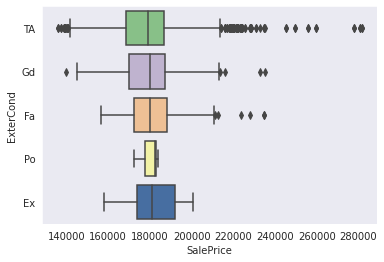

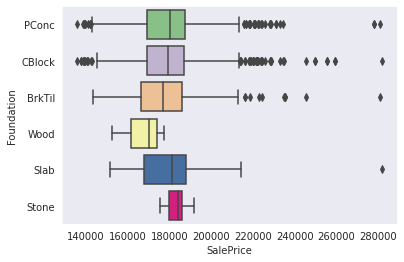

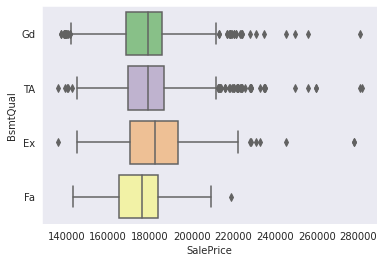

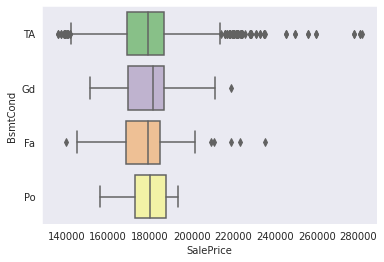

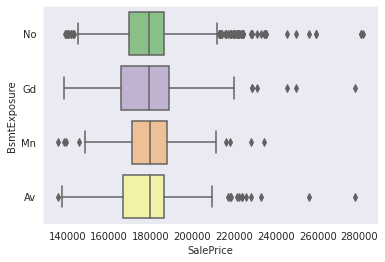

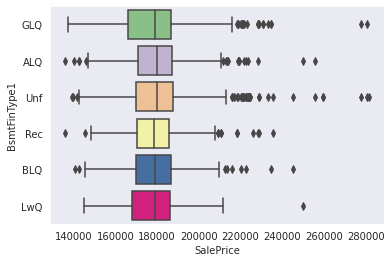

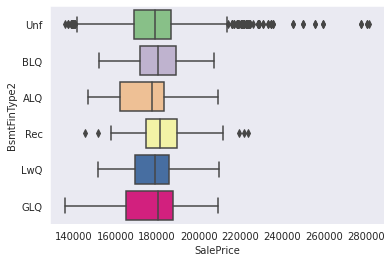

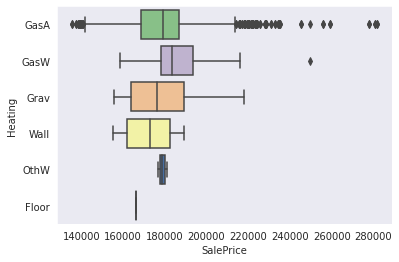

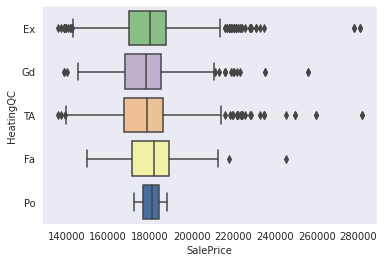

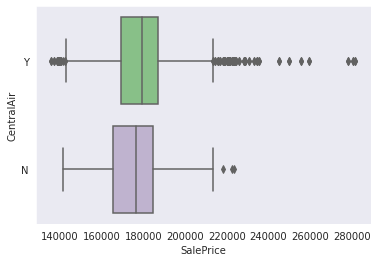

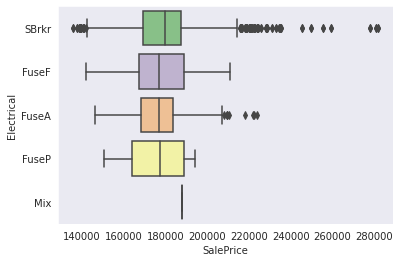

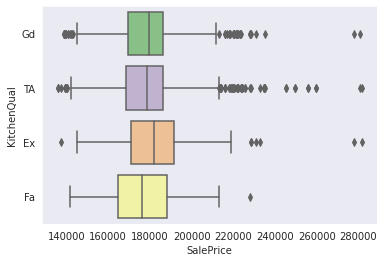

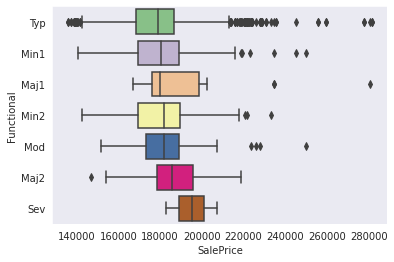

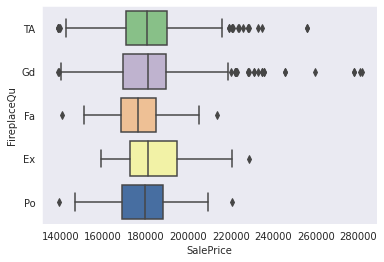

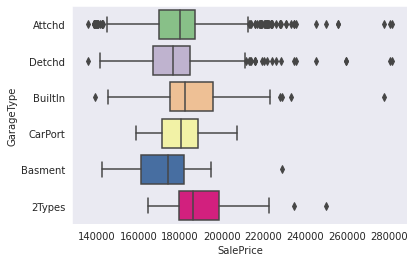

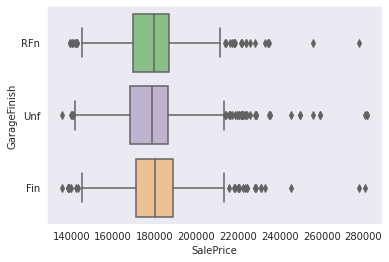

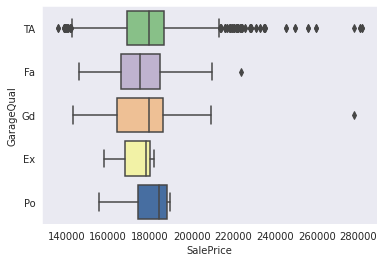

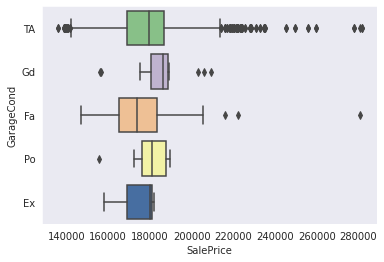

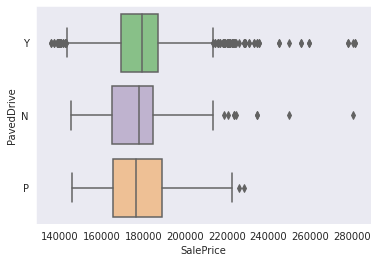

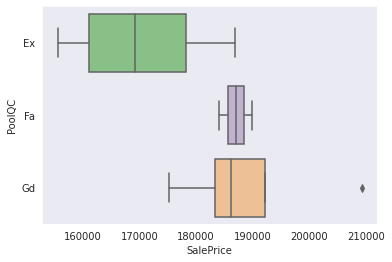

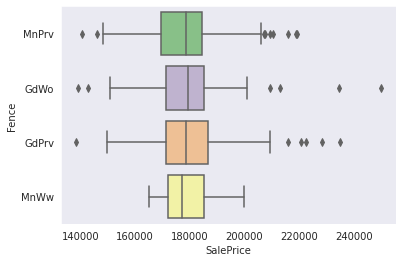

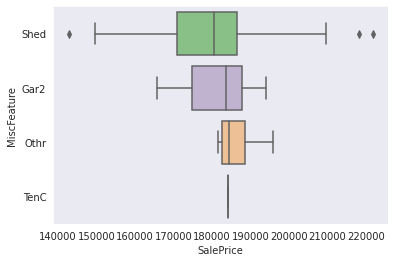

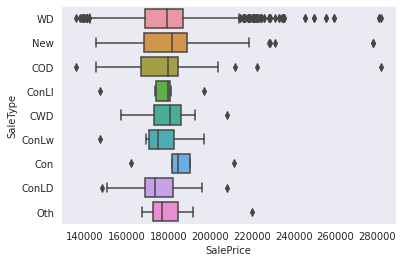

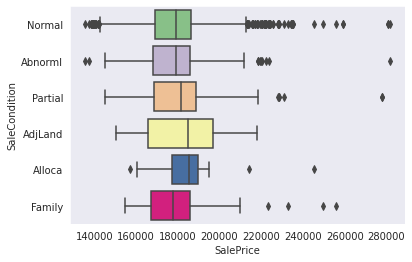

In [ ]:
for column in df.select_dtypes(include="object"):
 if df[column].nunique() < 10:
  sns.boxplot(y=column, x="SalePrice", data=df)
  plt.show()

In [ ]:
df_not_object = df.select_dtypes(exclude='object')
df_not_object.drop(columns = 'Id', inplace = True)
corrs_not_object = df_not_object.corr().round(2)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


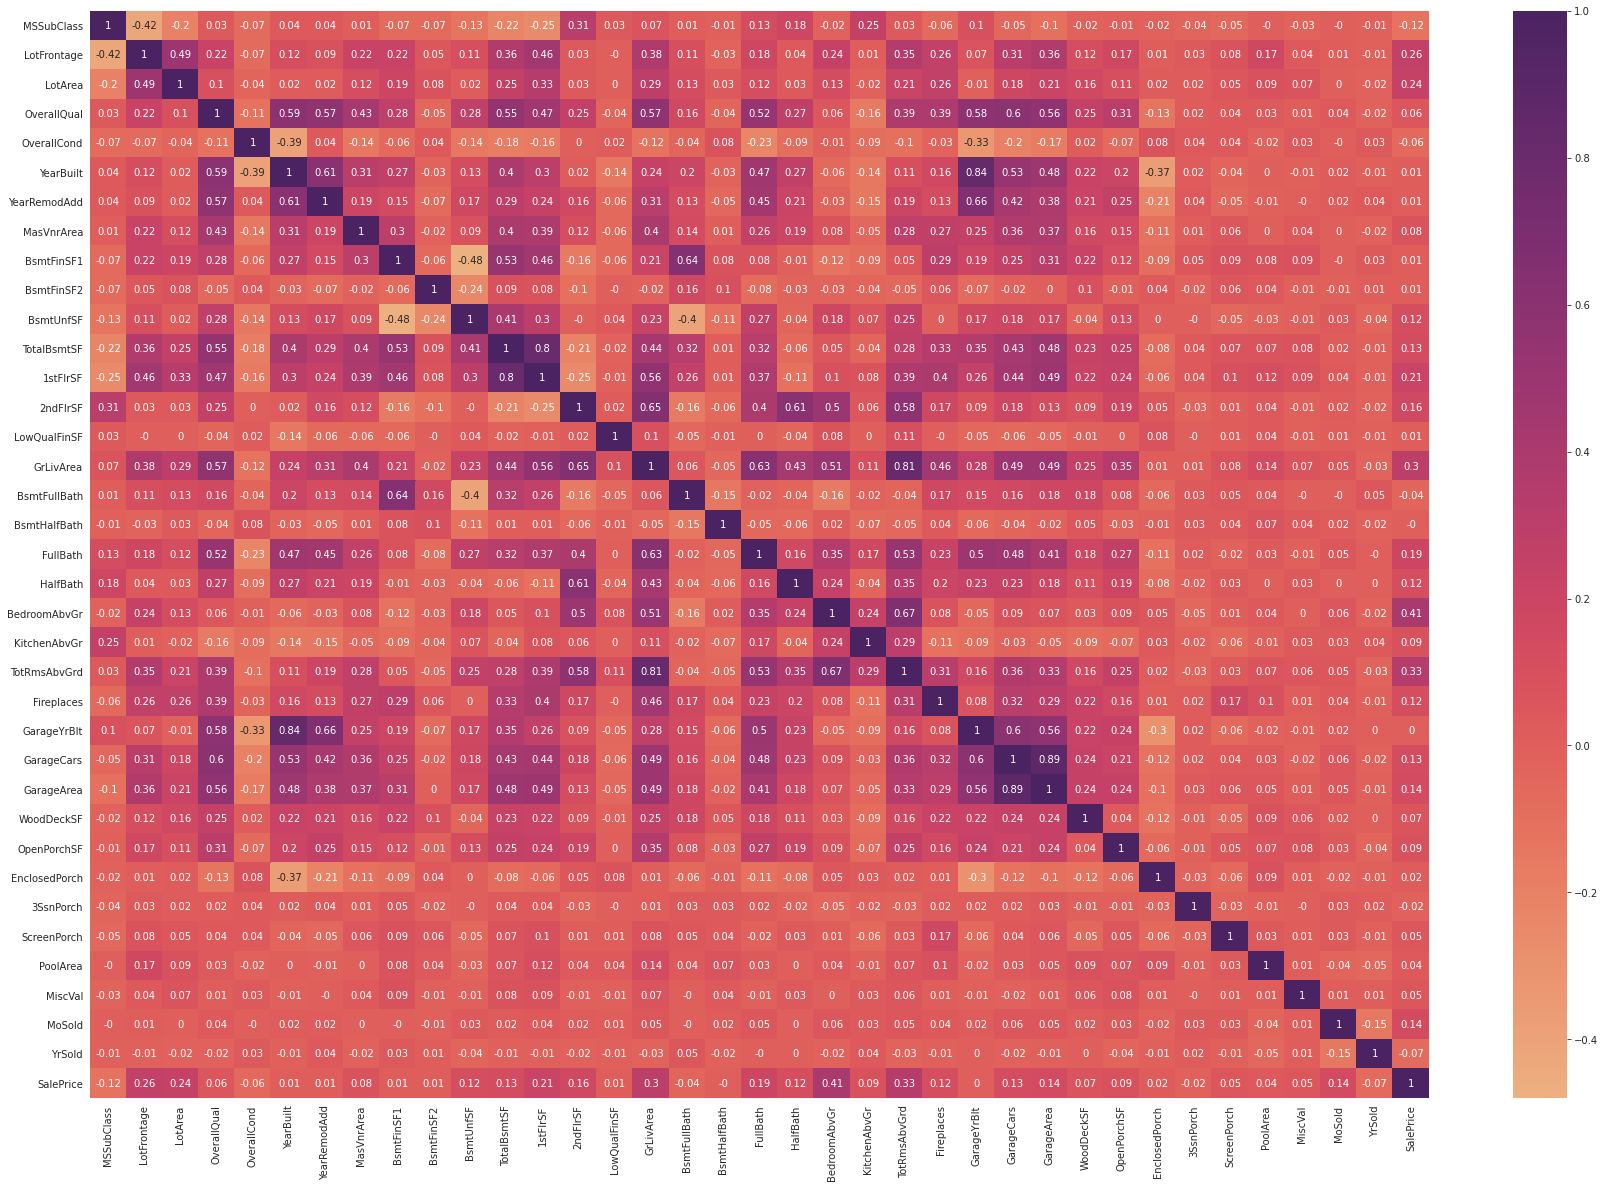

In [ ]:
plt.figure(figsize = (30,20))
sns.heatmap(data=corrs_not_object,annot=True,cmap="flare");

In [ ]:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        display(df.groupby(column).mean())

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSZoning,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FV,1416.870504,89.352518,59.529412,6549.359712,7.266187,5.014388,2004.079137,2004.431655,129.628788,374.280576,10.935252,683.546763,1068.762590,1076.604317,502.661871,2.302158,1581.568345,0.424460,0.000000,1.978417,0.654676,2.539568,1.000000,6.093525,0.467626,2004.158273,2.122302,582.316547,62.582734,107.625899,0.258993,1.611511,6.776978,0.000000,0.000000,6.266187,2007.949640,172516.395641
RH,1281.615385,89.807692,55.434783,7506.461538,5.346154,5.500000,1952.730769,1972.269231,38.961538,413.538462,10.884615,461.884615,886.307692,1041.346154,417.230769,19.807692,1478.384615,0.384615,0.000000,1.576923,0.076923,3.076923,1.269231,6.538462,0.307692,1962.761905,1.230769,368.307692,74.384615,33.384615,41.307692,0.000000,4.615385,0.000000,19.230769,7.076923,2007.884615,174326.925683
RL,1453.954084,49.381898,74.052202,11169.471965,6.196026,5.522296,1976.030905,1985.308609,112.353935,488.849448,58.269316,564.691391,1111.810155,1221.008389,312.649448,3.173068,1536.830905,0.467756,0.068463,1.604857,0.397351,2.920971,1.037086,6.568212,0.672406,1980.307126,1.847682,495.300221,105.430905,46.646358,18.226490,2.817219,17.982781,2.901987,58.731567,6.224283,2007.780574,180766.711639
RM,1496.382609,83.782609,52.246479,6400.239130,5.400000,5.991304,1942.358696,1975.260870,54.710870,248.468410,23.742919,516.583878,788.795207,906.967391,403.941304,11.234783,1322.143478,0.270153,0.050109,1.291304,0.245652,2.669565,1.078261,6.026087,0.315217,1959.391626,1.344227,348.126362,51.595652,34.343478,49.865217,1.967391,10.856522,0.000000,30.913043,6.063043,2007.791304,173610.131275


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Street,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Grvl,1208.857143,67.142857,102.000000,38048.142857,5.000000,5.142857,1955.000000,1963.571429,66.857143,554.000000,122.714286,290.857143,967.571429,1075.571429,23.857143,0.000000,1099.428571,0.857143,0.000000,1.142857,0.142857,2.285714,1.00000,5.142857,0.714286,1960.000000,1.714286,462.857143,127.857143,61.0000,47.142857,0.000000,37.571429,0.000000,100.000000,5.142857,2008.000000,174660.071247
Pave,1459.174229,57.088673,69.273181,10116.511950,6.110495,5.570142,1971.791133,1984.515760,103.179818,443.586279,49.834373,561.957727,1055.378378,1162.547974,337.790440,4.568756,1504.907170,0.431889,0.061698,1.573259,0.383097,2.864912,1.04399,6.460339,0.601316,1978.274918,1.774775,474.791407,94.351230,47.4115,22.561829,2.601316,16.114998,2.276758,50.934188,6.206096,2007.790786,179229.555547


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Alley,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Grvl,1593.478992,65.798319,59.911504,8607.882353,5.151261,6.168067,1920.201681,1971.621849,9.571429,143.327731,28.168067,618.613445,790.109244,930.151261,497.05042,17.613445,1444.815126,0.159664,0.058824,1.327731,0.176471,2.983193,1.100840,6.630252,0.319328,1947.240000,1.344538,359.420168,51.260504,39.789916,82.319328,0.000000,19.151261,0.0,73.949580,6.218487,2007.722689,177035.576460
Pave,1414.907895,105.460526,45.144928,5638.934211,6.671053,5.328947,1978.526316,1995.263158,111.554054,266.157895,14.394737,655.276316,935.828947,1004.736842,523.25000,13.684211,1541.671053,0.342105,0.013158,1.776316,0.565789,2.605263,1.039474,5.921053,0.355263,1987.287671,1.828947,480.486842,26.210526,97.092105,29.855263,2.947368,10.552632,0.0,6.578947,5.776316,2007.815789,170827.630828


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotShape,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
IR1,1447.950311,51.951346,75.134675,11629.580745,6.577640,5.477226,1982.563147,1989.283644,134.395397,540.609326,58.332642,570.041451,1168.983420,1263.242236,360.984472,1.969979,1626.196687,0.493776,0.070539,1.708075,0.457557,2.896480,1.019669,6.708075,0.767081,1985.473573,2.003106,532.333333,123.293996,55.025880,15.836439,3.420290,18.154244,2.939959,91.904762,6.177019,2007.743271,180887.150549
IR2,1416.342105,53.618421,67.437500,18913.065789,6.684211,5.368421,1988.236842,1996.118421,113.560000,502.407895,76.605263,574.092105,1153.105263,1246.460526,466.697368,8.223684,1721.381579,0.460526,0.105263,1.802632,0.578947,2.881579,1.000000,6.723684,0.684211,1990.618421,2.118421,555.184211,129.328947,62.381579,8.276316,3.815789,32.013158,0.000000,78.684211,6.394737,2007.631579,182265.515171
IR3,1402.187500,59.375000,117.636364,32064.187500,6.812500,4.875000,1984.062500,1996.000000,99.500000,881.312500,51.250000,598.125000,1530.687500,1479.062500,655.437500,0.000000,2134.500000,0.500000,0.125000,1.937500,0.562500,3.500000,1.000000,7.750000,1.125000,1992.200000,2.000000,560.250000,95.812500,75.250000,6.375000,0.000000,22.687500,30.000000,0.000000,6.312500,2007.562500,195862.079392
Reg,1466.394880,59.953704,66.887977,8871.520697,5.830610,5.631808,1965.271786,1981.346950,86.285088,386.762527,44.525054,555.857843,987.145425,1103.004902,316.285948,5.807190,1425.098039,0.399237,0.054466,1.488017,0.333333,2.839869,1.058824,6.302832,0.506536,1973.552108,1.638147,440.379292,77.790305,42.594771,26.926471,2.132898,14.408497,1.771786,28.860022,6.208606,2007.825163,178068.750929


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LandContour,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Bnk,1412.359649,60.350877,71.744898,11446.394737,5.666667,5.947368,1942.631579,1973.561404,58.333333,370.763158,75.570175,508.894737,955.228070,1183.491228,403.929825,32.017544,1619.438596,0.350877,0.017544,1.368421,0.307018,3.043860,1.078947,6.921053,0.675439,1958.398058,1.412281,380.096491,67.885965,44.333333,44.307018,1.263158,14.780702,4.210526,191.403509,6.105263,2007.833333,179580.322102
HLS,1649.537815,57.689076,73.657407,12391.932773,7.193277,5.352941,1981.798319,1990.756303,159.983051,622.924370,13.378151,616.042017,1252.344538,1355.689076,353.025210,1.176471,1709.890756,0.537815,0.100840,1.747899,0.369748,2.731092,1.025210,6.806723,0.890756,1985.250000,2.100840,552.378151,123.487395,50.352941,18.655462,6.680672,30.596639,3.126050,9.243697,6.428571,2007.613445,176825.782703
Low,1349.362069,45.086207,79.032258,27253.465517,5.775862,5.465517,1970.379310,1981.293103,77.224138,780.172414,113.551724,299.637931,1193.362069,1308.844828,186.586207,0.000000,1495.431034,0.844828,0.120690,1.344828,0.327586,2.413793,1.034483,5.724138,0.965517,1974.629630,1.775862,493.603448,204.724138,42.758621,18.344828,10.362069,27.982759,13.793103,16.379310,6.275862,2007.741379,185462.049488
Lvl,1454.295428,57.212831,68.879890,9647.513254,6.084902,5.564733,1972.597003,1984.725701,103.048431,431.369331,49.149885,566.926979,1047.446195,1149.307338,336.722244,3.611218,1489.640799,0.422530,0.060361,1.578179,0.387630,2.871687,1.043411,6.437188,0.577027,1978.811084,1.775557,474.940430,91.809066,47.552055,21.948137,2.293507,15.304648,1.890511,47.590088,6.195928,2007.798694,179172.903181


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Utilities,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AllPub,1458.419578,57.148046,69.324616,10171.33587,6.109305,5.570737,1971.783466,1984.497406,103.01046,444.275779,49.940138,561.197232,1055.413149,1162.288827,337.380837,4.562435,1504.2321,0.433368,0.061267,1.572812,0.382912,2.864061,1.043929,6.457627,0.601176,1978.2531,1.77474,474.805536,94.489104,47.444483,22.59495,2.597717,16.103079,2.273608,50.84642,6.206849,2007.790384,179205.386711
NoSeWa,945.000000,20.000000,NaN,14375.00000,6.000000,6.000000,1958.000000,1958.000000,541.00000,111.000000,354.000000,354.000000,819.000000,1344.000000,0.000000,0.000000,1344.0000,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,7.000000,1.000000,1958.0000,2.00000,525.000000,0.000000,118.000000,0.00000,0.000000,233.000000,0.000000,0.00000,1.000000,2009.000000,180161.697341


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LotConfig,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Corner,1405.228628,50.785288,82.987469,10905.375746,6.099404,5.642147,1966.598410,1982.302187,106.700803,427.292247,42.085487,597.186879,1066.564612,1190.846918,351.143141,4.916501,1546.906561,0.417495,0.043738,1.558648,0.367793,2.926441,1.059642,6.582505,0.614314,1975.313278,1.838966,492.707753,82.934394,55.149105,30.459245,2.051690,17.165010,4.666004,62.087475,6.174950,2007.807157,179714.292147
CulDSac,1422.982955,48.778409,56.775281,15638.221591,6.579545,5.539773,1984.522727,1989.477273,147.660920,613.250000,89.227273,478.528409,1181.005682,1310.119318,371.829545,0.000000,1681.948864,0.534091,0.113636,1.676136,0.500000,2.909091,1.000000,6.727273,0.857955,1985.425287,2.079545,554.034091,139.880682,52.136364,18.687500,4.965909,21.380682,5.488636,123.011364,5.988636,2007.761364,183084.739537
FR2,1368.047059,70.235294,61.276923,10595.976471,6.235294,5.435294,1982.270588,1990.258824,81.333333,444.835294,60.164706,503.564706,1008.564706,1103.541176,330.458824,0.000000,1434.000000,0.388235,0.070588,1.705882,0.482353,2.870588,1.035294,6.129412,0.482353,1984.641975,1.870588,467.211765,88.247059,52.764706,8.317647,5.552941,3.494118,0.000000,27.058824,6.305882,2007.929412,181239.161656
FR3,1875.642857,76.785714,79.300000,10498.857143,6.571429,5.714286,1980.428571,1994.714286,127.714286,656.538462,69.538462,355.692308,1081.769231,1123.785714,372.642857,0.000000,1496.428571,0.846154,0.000000,1.642857,0.357143,2.571429,1.000000,6.214286,0.500000,1988.214286,2.142857,558.785714,106.428571,44.571429,24.785714,0.000000,0.000000,0.000000,0.000000,6.142857,2007.285714,177552.256989
Inside,1475.085066,58.653119,67.228479,9540.327977,6.062382,5.558601,1971.432892,1984.261815,99.250357,432.354442,48.104915,563.238658,1043.698015,1145.885633,330.810491,5.064745,1481.760870,0.427423,0.061466,1.560964,0.372401,2.846408,1.044423,6.419660,0.582703,1977.983450,1.727660,463.645390,93.554348,45.027883,21.645558,2.425331,16.112004,1.540643,43.746219,6.224480,2007.787807,178708.678184


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
LandSlope,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Gtl,1461.078374,57.304064,69.066753,9774.256531,6.112845,5.566401,1971.979681,1984.619013,102.268935,431.425045,47.499093,571.961887,1050.886025,1156.082729,340.136067,4.494194,1500.712990,0.421206,0.057734,1.578374,0.383527,2.876996,1.045718,6.472424,0.585269,1978.544028,1.774229,474.242105,91.949202,47.569303,22.346880,2.511248,15.252540,2.332729,51.794993,6.214078,2007.787736,179296.760436
Mod,1470.360656,54.549180,74.247423,13003.352459,6.057377,5.639344,1968.262295,1982.360656,119.319672,688.180328,79.098361,358.778689,1126.057377,1275.532787,285.967213,6.590164,1568.090164,0.622951,0.131148,1.491803,0.352459,2.663934,1.008197,6.221311,0.860656,1972.991525,1.786885,486.434426,139.418033,46.377049,30.459016,3.762295,36.606557,1.180328,31.147541,5.893443,2007.860656,177385.208461
Sev,936.375000,43.750000,95.500000,59277.937500,5.625000,5.500000,1958.875000,1974.000000,119.812500,720.875000,260.687500,270.000000,1251.562500,1376.625000,191.562500,0.000000,1568.187500,1.000000,0.187500,1.125000,0.437500,2.062500,1.000000,5.625000,1.437500,1965.666667,1.750000,475.375000,179.125000,34.062500,10.125000,8.125000,17.812500,0.000000,75.000000,6.750000,2007.875000,179721.710820


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Condition1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Artery,1375.315217,62.228261,71.113636,9961.728261,5.369565,5.956522,1934.913043,1967.391304,38.521739,278.086957,27.684783,559.391304,865.163043,1023.576087,426.445652,16.402174,1466.423913,0.315217,0.097826,1.369565,0.184783,3.032609,1.108696,6.423913,0.434783,1953.246914,1.413043,391.739130,51.260870,44.630435,63.086957,3.869565,13.728261,11.663043,39.130435,6.173913,2007.989130,179111.352509
Feedr,1494.620253,50.316456,75.609023,10461.968354,5.430380,5.696203,1956.139241,1975.816456,75.826923,439.681529,59.554140,479.254777,978.490446,1133.759494,307.386076,6.936709,1448.082278,0.484076,0.044586,1.367089,0.354430,3.044304,1.120253,6.430380,0.588608,1965.027972,1.525316,423.917722,79.215190,41.822785,33.993671,1.025316,10.607595,5.848101,98.259494,6.000000,2007.841772,181337.545426
Norm,1456.480738,57.945425,68.623853,10065.286918,6.157705,5.544141,1973.702648,1985.429374,106.498787,447.925762,49.141653,566.260032,1063.327448,1163.773676,332.877608,4.184992,1500.836276,0.430349,0.063830,1.585072,0.386838,2.834270,1.037721,6.430578,0.602729,1979.627740,1.792854,478.119229,96.428170,46.800562,20.753210,2.430578,16.217897,1.628010,50.085072,6.204655,2007.785714,178890.186196
PosA,1650.800000,34.000000,103.125000,14083.200000,6.950000,5.950000,1972.300000,1986.450000,202.800000,618.800000,83.500000,535.800000,1238.100000,1630.350000,343.950000,0.000000,1974.300000,0.700000,0.000000,1.850000,0.500000,3.050000,1.000000,7.250000,1.200000,1972.350000,2.100000,571.050000,124.050000,80.250000,19.650000,0.000000,65.950000,0.000000,0.000000,6.450000,2007.700000,185395.667067
PosN,1398.358974,44.102564,80.400000,12820.025641,7.000000,5.487179,1981.615385,1987.461538,211.820513,704.153846,50.615385,647.076923,1401.846154,1498.564103,400.948718,0.000000,1899.512821,0.538462,0.076923,1.846154,0.487179,3.179487,1.000000,7.435897,1.025641,1982.794872,2.179487,623.589744,152.794872,85.512821,24.641026,12.974359,29.512821,0.000000,8.974359,7.307692,2008.153846,182481.031694
RRAe,1599.642857,41.071429,61.652174,11003.071429,5.500000,5.500000,1982.107143,1987.785714,37.928571,427.892857,63.642857,469.821429,961.357143,1089.642857,113.428571,0.000000,1203.071429,0.607143,0.000000,1.285714,0.357143,3.035714,1.107143,6.107143,0.214286,1981.720000,1.571429,427.714286,62.250000,41.571429,8.714286,0.000000,0.000000,0.000000,14.285714,6.285714,2007.535714,181434.611738
RRAn,1525.080000,59.000000,65.891304,11603.680000,6.320000,5.580000,1977.620000,1989.400000,40.191489,319.540000,66.520000,574.200000,960.260000,1049.340000,515.240000,3.120000,1567.700000,0.340000,0.000000,1.760000,0.500000,3.040000,1.020000,7.000000,0.560000,1987.480000,1.920000,484.560000,76.100000,62.380000,12.440000,0.460000,19.260000,10.380000,61.200000,6.200000,2007.300000,182417.060498
RRNe,1528.333333,36.666667,58.333333,10012.166667,5.833333,6.166667,1961.166667,1984.000000,61.666667,251.333333,143.166667,478.666667,873.166667,975.166667,268.000000,0.000000,1243.166667,0.166667,0.000000,1.500000,0.333333,2.333333,1.000000,5.833333,0.333333,1975.333333,1.833333,458.333333,141.666667,23.333333,45.000000,39.666667,0.000000,0.000000,0.000000,5.666667,2008.333333,173871.008445
RRNn,1233.666667,54.444444,78.800000,10061.555556,6.888889,5.555556,1980.111111,1989.000000,165.111111,435.444444,79.111111,592.222222,1106.777778,1166.555556,552.777778,0.000000,1719.333333,0.555556,0.000000,1.777778,0.444444,3.111111,1.000000,7.111111,0.666667,1980.111111,2.111111,531.000000,102.000000,66.666667,9.333333,18.666667,0.000000,0.000000,0.000000,4.55

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Condition2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Artery,1600.600000,100.000000,72.25000,8682.400000,5.000000,5.800000,1948.200000,1965.600000,0.000000,440.200000,0.000000,488.400000,928.600000,1057.600000,336.600000,0.000000,1394.200000,0.600000,0.000000,1.200000,0.200000,2.600000,1.400000,6.200000,0.400000,1938.500000,1.000000,237.000000,42.000000,32.600000,0.000000,0.000000,0.000000,0.000000,0.000000,4.40,2008.000000,169638.139769
Feedr,1564.666667,70.000000,67.75000,10294.166667,5.583333,6.833333,1936.000000,1978.166667,12.000000,168.333333,33.666667,675.333333,877.333333,1021.333333,423.500000,13.000000,1457.833333,0.083333,0.000000,1.416667,0.166667,2.916667,1.083333,6.416667,0.083333,1962.916667,1.583333,429.416667,78.833333,49.250000,12.333333,0.000000,0.000000,0.000000,83.333333,6.75,2007.666667,183688.689758
Norm,1458.773822,57.019197,69.28104,10168.578360,6.103665,5.563002,1971.902269,1984.477487,103.007741,442.961243,50.077165,560.111383,1053.149791,1160.346248,336.667365,4.549389,1501.563002,0.433112,0.062173,1.571728,0.383595,2.864921,1.042583,6.452007,0.602792,1978.312845,1.774092,474.269553,94.345550,47.159162,22.717627,2.621291,16.232112,2.294241,48.323560,6.20,2007.791623,179217.488540
PosA,1778.750000,33.750000,86.50000,13424.000000,10.000000,6.000000,1978.000000,2005.250000,241.000000,860.000000,0.000000,998.250000,1858.250000,2015.250000,313.500000,0.000000,2328.750000,0.750000,0.000000,2.250000,0.500000,2.750000,1.000000,8.250000,1.250000,2002.000000,2.750000,824.500000,216.250000,160.000000,0.000000,0.000000,70.500000,0.000000,0.000000,7.25,2007.750000,189123.472439
PosN,1250.750000,55.000000,97.25000,18535.750000,9.500000,5.000000,2006.500000,2007.250000,488.500000,1772.000000,0.000000,574.000000,2346.000000,2355.500000,384.500000,0.000000,2740.000000,1.000000,0.000000,2.250000,0.250000,2.250000,1.000000,8.250000,1.250000,2006.500000,2.750000,864.000000,155.500000,181.250000,0.000000,0.000000,0.000000,0.000000,0.000000,8.25,2008.000000,169577.483214
RRAe,1231.000000,90.000000,NaN,18890.000000,5.000000,5.000000,1977.000000,1977.000000,1.000000,498.000000,211.000000,652.000000,1361.000000,1361.000000,1259.000000,0.000000,2620.000000,0.000000,0.000000,2.000000,2.000000,4.000000,2.000000,12.000000,1.000000,1977.000000,2.000000,600.000000,155.000000,24.000000,145.000000,0.000000,0.000000,0.000000,8300.000000,8.00,2007.000000,174841.840075
RRAn,1004.000000,90.000000,NaN,11500.000000,5.000000,6.000000,1976.000000,1976.000000,164.000000,0.000000,0.000000,1680.000000,1680.000000,1680.000000,0.000000,0.000000,1680.000000,0.000000,0.000000,2.000000,0.000000,4.000000,2.000000,8.000000,0.000000,1976.000000,2.000000,528.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.00,2007.000000,189806.546645
RRNn,289.500000,25.000000,54.50000,7279.500000,4.500000,6.500000,1941.000000,1972.500000,0.000000,90.000000,322.500000,260.000000,672.500000,672.500000,0.000000,0.000000,672.500000,0.500000,0.000000,1.000000,0.000000,1.500000,1.000000,4.000000,0.000000,1941.500000,1.500000,480.000000,94.500000,25.000000,43.500000,0.000000,0.000000,0.000000,0.000000,5.50,2008.000000,174161.721831


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
BldgType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1Fam,1454.825635,41.521015,73.990918,10971.717853,6.114024,5.643362,1970.078652,1984.232626,101.392527,441.726894,52.930891,570.679850,1065.337635,1172.068248,345.260092,4.940907,1522.269247,0.413578,0.063307,1.545568,0.386600,2.914274,1.002913,6.522264,0.637953,1976.708604,1.790591,483.963364,97.887640,49.215148,24.924677,2.814399,17.584270,2.735331,54.130254,6.204328,2007.785268,180283.128977
2fmCon,1446.745763,184.915254,68.232143,13215.169492,4.949153,5.610169,1932.644068,1968.457627,13.593220,490.101695,16.423729,386.135593,892.661017,1027.271186,457.593220,14.525424,1499.389831,0.610169,0.000000,1.542373,0.101695,3.271186,1.440678,7.101695,0.305085,1956.682927,1.220339,344.779661,71.389831,35.491525,63.406780,0.000000,7.033898,0.000000,95.932203,5.220339,2007.711864,179412.457624
Duplex,1510.229358,90.000000,70.836957,9375.155963,5.119266,5.000000,1967.330275,1971.036697,85.669725,369.577982,32.174312,618.055046,1019.807339,1341.376147,314.651376,0.000000,1656.027523,0.541284,0.055046,1.963303,0.321101,3.798165,1.862385,8.036697,0.211009,1972.296296,1.697248,428.770642,42.064220,19.091743,9.064220,0.000000,0.000000,0.000000,110.201835,6.871560,2007.908257,187570.613797
Twnhs,1522.437500,155.520833,24.307692,2280.479167,5.979167,5.479167,1984.218750,1986.218750,155.135417,338.979167,26.739583,374.833333,740.552083,748.822917,497.291667,3.125000,1249.239583,0.364583,0.041667,1.520833,0.687500,2.375000,1.000000,5.406250,0.281250,1986.651163,1.416667,357.166667,70.125000,28.812500,0.583333,1.250000,3.208333,0.000000,0.000000,6.333333,2007.822917,166847.207161
TwnhsE,1449.449339,131.541850,41.862434,4789.233480,6.872247,5.083700,1996.462555,1996.792952,130.777778,534.352423,46.246696,559.202643,1139.801762,1183.343612,161.555066,0.704846,1345.603524,0.568282,0.070485,1.696035,0.312775,1.977974,1.000000,5.286344,0.616740,1996.857143,1.938326,483.004405,99.268722,53.299559,3.466960,2.762115,16.779736,0.000000,0.000000,6.074890,2007.806167,169124.133098


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
HouseStyle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.5Fin,1502.771987,59.087948,63.035842,10140.449511,5.312704,5.970684,1935.755700,1969.234528,30.332248,249.521173,30.657980,562.573290,842.752443,971.094463,517.830619,26.452769,1515.377850,0.231270,0.052117,1.371336,0.267101,3.084691,1.048860,6.576547,0.508143,1953.514286,1.306189,357.635179,59.211726,23.824104,52.306189,3.029316,16.964169,1.446254,66.449511,5.947883,2007.824104,179413.437191
1.5Unf,865.222222,52.222222,56.470588,7185.777778,5.500000,6.333333,1934.944444,1962.111111,0.000000,123.166667,14.388889,707.444444,845.000000,907.722222,0.000000,0.000000,907.722222,0.166667,0.055556,1.000000,0.000000,2.111111,1.055556,4.722222,0.333333,1945.466667,1.166667,273.833333,18.444444,13.222222,68.111111,0.000000,12.888889,0.000000,0.000000,6.055556,2007.555556,174133.765726
1Story,1459.706164,37.869863,71.775777,10503.142466,6.013699,5.479452,1975.402740,1984.215753,102.743094,531.382454,64.239890,616.928718,1212.551062,1319.871233,0.550000,0.265753,1320.686986,0.510288,0.060357,1.476027,0.146575,2.583562,1.037671,5.899315,0.558219,1979.496403,1.763014,481.434247,90.875342,43.411644,17.619178,3.574658,17.383562,1.334932,61.205479,6.197260,2007.815068,178138.431639
2.5Fin,618.875000,88.750000,78.750000,12468.125000,6.375000,6.750000,1911.375000,1981.375000,0.000000,144.625000,0.000000,817.750000,962.375000,1334.750000,1120.750000,392.500000,2848.000000,0.250000,0.000000,1.875000,0.375000,4.625000,1.125000,10.625000,0.875000,1982.500000,1.500000,466.750000,141.375000,105.375000,3.750000,0.000000,51.250000,0.000000,0.000000,6.000000,2007.625000,181739.023827
2.5Unf,1622.739130,85.000000,62.263158,11289.695652,6.608696,6.217391,1918.478261,1977.826087,64.260870,124.521739,29.521739,796.478261,950.521739,1077.130435,926.521739,0.000000,2003.652174,0.086957,0.000000,1.739130,0.608696,3.782609,1.217391,8.347826,0.869565,1937.650000,1.434783,370.478261,62.260870,97.304348,117.782609,0.000000,12.130435,0.000000,43.478261,6.652174,2007.608696,192917.352657
2Story,1434.543253,79.377163,67.824859,9817.685121,6.634371,5.494810,1979.874279,1991.746251,136.192532,352.673587,25.445213,539.821223,917.940023,987.162630,869.530565,1.478662,1858.171857,0.329873,0.038062,1.855825,0.860438,3.290657,1.049596,7.464821,0.701269,1985.850478,2.001155,516.438799,109.400231,65.867359,19.753172,1.170704,14.146482,2.382930,32.603230,6.279123,2007.760092,181398.015897
SFoyer,1632.542169,103.253012,62.140625,8211.204819,5.373494,5.746988,1977.361446,1981.108434,71.650602,761.771084,73.036145,73.361446,908.168675,1010.337349,22.759036,0.000000,1033.096386,0.975904,0.156627,1.144578,0.096386,2.156627,1.096386,5.120482,0.397590,1980.857143,1.614458,435.120482,94.228916,21.277108,14.746988,0.000000,8.518072,0.000000,43.975904,6.228916,2007.746988,169732.494916
SLvl,1495.921875,84.843750,75.752688,10490.515625,5.976562,5.718750,1976.281250,1981.226562,108.259843,444.882812,97.515625,307.250000,849.648438,1149.593750,230.804688,2.023438,1382.421875,0.492188,0.210938,1.539062,0.312500,2.921875,0.992188,6.218750,0.750000,1977.421875,1.765625,470.820312,131.757812,34.507812,10.695312,2.703125,18.015625,16.515625,39.609375,6.312500,2007.757812,180546.288148


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
RoofStyle,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Flat,1214.600000,49.500000,90.833333,18581.900000,5.650000,5.750000,1962.950000,1976.400000,53.750000,516.650000,301.300000,200.400000,1018.350000,1366.200000,214.750000,0.000000,1580.950000,0.650000,0.250000,1.550000,0.100000,2.650000,0.950000,5.850000,1.100000,1964.750000,1.50000,414.650000,124.700000,58.700000,10.600000,6.500000,34.250000,36.900000,25.000000,6.300000,2007.650000,185704.267125
Gable,1463.504143,60.115569,67.004715,9699.328827,5.968600,5.581771,1970.837767,1984.215002,78.045734,392.668412,43.277487,555.472077,991.417976,1096.736154,360.979939,5.226341,1462.942433,0.395460,0.055434,1.560401,0.396860,2.857828,1.045792,6.352377,0.546446,1977.795843,1.72164,457.286649,89.232447,46.456607,24.157872,2.219799,12.987789,1.747928,31.977758,6.150022,2007.794156,178663.466135
Gambrel,1462.850000,62.500000,58.750000,8433.750000,5.500000,6.700000,1925.250000,1979.750000,4.100000,145.450000,18.000000,617.550000,781.000000,884.100000,663.950000,15.600000,1563.650000,0.150000,0.100000,1.350000,0.250000,3.250000,1.050000,7.300000,0.550000,1946.315789,1.20000,321.550000,49.400000,46.050000,35.150000,0.000000,37.600000,0.000000,0.000000,6.850000,2007.750000,179060.016430
Hip,1449.320513,44.706960,78.534934,11858.293040,6.727106,5.467033,1977.970696,1986.120879,212.171587,669.280220,68.025641,598.705128,1336.010989,1437.342491,220.126374,1.637363,1659.106227,0.595238,0.076923,1.635531,0.320513,2.880952,1.036630,6.868132,0.813187,1981.826742,2.02381,554.293040,115.115385,52.043956,15.593407,4.194139,27.628205,3.346154,119.362637,6.380952,2007.783883,181210.716579
Mansard,997.100000,60.000000,79.625000,12145.900000,6.300000,5.900000,1948.200000,1979.500000,214.600000,227.500000,46.200000,595.100000,868.800000,1207.700000,842.700000,0.000000,2050.400000,0.000000,0.200000,1.600000,1.100000,3.400000,1.100000,7.700000,0.700000,1962.666667,2.10000,561.400000,112.100000,8.600000,49.800000,0.000000,48.400000,0.000000,45.000000,7.100000,2008.100000,186029.903432
Shed,2086.800000,38.000000,109.666667,19149.200000,6.200000,5.000000,1979.400000,1979.400000,39.800000,625.600000,299.800000,300.200000,1225.600000,1423.400000,290.200000,0.000000,1713.600000,1.000000,0.000000,1.000000,0.800000,1.800000,1.200000,6.200000,0.800000,1979.400000,1.60000,481.000000,244.200000,36.400000,29.000000,0.000000,0.000000,0.000000,1660.000000,6.600000,2007.400000,177163.493856


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
RoofMatl,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ClyTile,1299.000000,60.000000,313.000000,63887.000000,10.000000,5.000000,2008.000000,2008.000000,796.000000,5644.000000,0.000000,466.000000,6110.000000,4692.000000,950.000000,0.000000,5642.000000,2.000000,0.000000,2.000000,1.000000,3.000000,1.000000,12.000000,3.000000,2008.000000,2.000000,1418.000000,214.000000,292.000000,0.000000,0.000000,0.000000,480.000000,0.000000,1.000000,2008.000000,175231.189710
CompShg,1460.935812,57.239565,68.987395,10027.748860,6.100666,5.567871,1971.813750,1984.555244,102.273338,440.090175,47.590175,563.395439,1051.075789,1155.715188,336.831638,4.425816,1496.972641,0.428571,0.059670,1.572431,0.381971,2.864609,1.044195,6.450368,0.592424,1978.332102,1.772982,473.790877,93.412838,47.118906,22.686075,2.588565,15.808488,1.878288,49.367590,6.202034,2007.794458,179094.546720
Membran,272.000000,20.000000,73.000000,39104.000000,7.000000,7.000000,1954.000000,2005.000000,0.000000,226.000000,1063.000000,96.000000,1385.000000,1363.000000,0.000000,0.000000,1363.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,2.000000,1954.000000,2.000000,439.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2008.000000,177304.425753
Metal,121.000000,80.000000,NaN,21453.000000,6.000000,5.000000,1969.000000,1969.000000,0.000000,938.000000,0.000000,0.000000,938.000000,988.000000,0.000000,0.000000,988.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,4.000000,2.000000,1969.000000,2.000000,540.000000,0.000000,130.000000,0.000000,130.000000,0.000000,0.000000,0.000000,10.000000,2006.000000,189673.295302
Roll,1276.000000,90.000000,95.000000,11345.000000,5.000000,5.000000,1948.000000,1950.000000,567.000000,220.000000,0.000000,708.000000,928.000000,928.000000,992.000000,0.000000,1920.000000,0.000000,0.000000,2.000000,0.000000,4.000000,2.000000,10.000000,0.000000,1948.000000,2.000000,400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2007.000000,182997.570116
Tar&Grv,1529.782609,48.695652,89.466667,17802.478261,5.739130,5.521739,1964.869565,1975.565217,85.391304,551.608696,238.391304,327.130435,1117.130435,1447.304348,186.739130,0.000000,1634.043478,0.608696,0.260870,1.565217,0.130435,2.869565,1.000000,6.173913,1.000000,1966.777778,1.478261,409.782609,99.043478,72.478261,22.782609,0.000000,35.782609,32.086957,304.347826,6.086957,2007.739130,189144.122689
WdShake,1360.444444,47.777778,91.600000,14905.333333,7.222222,5.888889,1974.555556,1981.555556,221.111111,488.555556,139.111111,517.888889,1145.555556,1627.555556,603.777778,0.000000,2231.333333,0.666667,0.111111,1.666667,0.888889,3.000000,1.000000,8.000000,1.333333,1973.888889,2.444444,692.111111,184.333333,35.888889,29.333333,0.000000,53.777778,0.000000,0.000000,6.777778,2007.777778,186551.925302
WdShngl,796.142857,42.142857,91.571429,29171.571429,8.285714,5.857143,1966.142857,1981.571429,204.142857,814.142857,178.714286,673.428571,1666.285714,1850.571429,484.285714,81.714286,2416.571429,1.000000,0.142857,1.428571,0.857143,2.428571,1.000000,7.428571,1.428571,1980.571429,2.428571,676.142857,390.714286,79.428571,0.000000,0.000000,58.571429,0.000000,0.000000,6.857143,2007.000000,186453.003459


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MasVnrType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BrkCmn,1263.480000,37.400000,77.444444,17178.560000,5.360000,5.520000,1960.640000,1974.680000,195.480000,368.680000,137.520000,414.200000,920.400000,1208.200000,162.040000,0.000000,1370.240000,0.360000,0.160000,1.400000,0.280000,2.880000,1.080000,6.320000,0.680000,1964.608696,1.480000,388.800000,74.440000,55.960000,28.760000,0.000000,15.800000,0.000000,100.000000,6.400000,2007.480000,178271.348386
BrkFace,1435.249147,58.452787,73.668630,10386.225256,6.639363,5.410694,1984.242321,1988.193402,261.672355,562.977247,50.249147,578.832765,1192.059158,1281.938567,367.659841,0.000000,1649.598407,0.507395,0.079636,1.722412,0.480091,2.971559,1.029579,6.770193,0.763367,1985.517878,2.050057,543.072810,116.464164,53.707622,11.531286,3.547213,21.549488,2.237770,44.453925,6.255973,2007.725825,180983.683618
None,1473.824694,57.006407,66.081911,9822.953990,5.638323,5.721025,1961.576587,1980.397204,0.717531,345.775641,52.391026,527.914336,926.081002,1051.130460,335.315667,7.682003,1394.128130,0.371429,0.051895,1.447874,0.337798,2.825277,1.055329,6.212580,0.473500,1971.199495,1.544289,414.201049,80.032033,40.407688,30.481654,2.113570,13.803145,2.319161,49.983692,6.149680,2007.803727,178403.061017
Stone,1422.128514,56.024096,76.047826,11114.108434,7.441767,5.152610,1996.112450,1998.650602,239.550201,703.522088,27.606426,729.385542,1460.514056,1493.662651,251.590361,0.000000,1745.253012,0.602410,0.060241,1.875502,0.329317,2.751004,1.012048,7.052209,0.899598,1996.790323,2.393574,653.562249,120.337349,69.437751,7.526104,3.064257,15.060241,2.506024,81.726908,6.232932,2007.991968,178268.501927


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
ExterQual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex,1426.355140,48.878505,86.861386,13801.186916,8.990654,5.289720,2002.841121,2006.420561,430.867925,1050.056075,22.336449,796.813084,1869.205607,1868.233645,306.000000,0.000000,2174.233645,0.775701,0.056075,2.056075,0.476636,2.672897,1.000000,8.046729,1.205607,2004.317757,2.747664,791.915888,176.485981,100.121495,0.345794,9.233645,30.037383,5.831776,186.728972,6.467290,2007.962617,181356.776311
Fa,1579.379310,72.413793,68.444444,8699.241379,3.862069,4.482759,1934.068966,1956.137931,9.482759,189.000000,30.241379,470.965517,690.206897,916.758621,282.310345,36.724138,1235.793103,0.241379,0.034483,1.241379,0.103448,2.689655,1.206897,5.896552,0.172414,1951.647059,0.827586,215.275862,23.965517,29.862069,69.482759,0.000000,6.344828,0.000000,120.689655,5.344828,2008.344828,176681.541941
Gd,1448.402863,60.368098,71.807125,10173.991820,7.165644,5.290389,1994.854806,2000.358896,142.778474,483.871166,38.184049,699.742331,1221.797546,1269.422290,453.892638,2.103272,1725.418200,0.483640,0.033742,1.900818,0.525562,2.826176,1.004090,6.821063,0.722904,1996.993814,2.210634,582.446830,119.956033,68.256646,11.249489,2.677914,12.584867,2.896728,19.427403,6.263804,2007.773006,178861.180550
TA,1464.122472,55.570225,66.784741,9996.369663,5.389888,5.756742,1957.801124,1974.874157,63.737493,389.547499,58.499157,472.501967,920.548623,1065.069101,275.579775,5.656180,1346.305056,0.387514,0.077615,1.367978,0.302809,2.898315,1.065730,6.170787,0.505618,1965.797093,1.491849,400.717819,76.624157,33.129213,29.444944,2.192697,17.461236,1.750562,59.138764,6.168539,2007.782022,179327.418331


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
ExterCond,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex,1876.666667,53.750000,62.363636,10697.000000,6.666667,8.000000,1953.916667,1993.166667,114.750000,493.166667,163.250000,363.166667,1019.583333,1098.416667,544.333333,0.000000,1642.750000,0.250000,0.083333,1.833333,0.500000,2.916667,1.000000,6.750000,0.750000,1969.363636,1.583333,477.916667,122.083333,103.250000,59.583333,18.750000,18.000000,0.000000,0.000000,5.500000,2007.750000,181437.141138
Fa,1512.672131,73.114754,68.236364,10401.032787,4.639344,4.442623,1934.819672,1963.377049,40.786885,251.000000,24.868852,561.442623,837.311475,1067.737705,299.524590,14.131148,1381.393443,0.311475,0.065574,1.377049,0.163934,2.950820,1.147541,6.409836,0.442623,1951.933333,1.196721,329.475410,63.967213,38.131148,60.344262,0.000000,11.918033,13.114754,75.409836,5.295082,2007.934426,182550.012313
Gd,1457.902357,51.902357,68.495833,10235.319865,5.676768,6.707071,1954.161616,1985.259259,78.599327,435.690236,82.518519,414.922559,933.131313,1094.952862,366.306397,3.936027,1465.195286,0.468013,0.094276,1.471380,0.303030,2.902357,1.037037,6.333333,0.582492,1966.362989,1.572391,437.919192,103.612795,40.946128,34.377104,3.114478,21.252525,4.208754,104.915825,6.138047,2007.936027,179299.894086
Po,1362.666667,46.666667,68.333333,9211.333333,3.000000,3.000000,1959.000000,1968.000000,0.000000,0.000000,0.000000,648.000000,648.000000,1085.000000,405.333333,0.000000,1490.333333,0.000000,0.000000,2.000000,0.666667,3.000000,1.333333,6.666667,0.000000,1968.500000,1.333333,367.666667,154.333333,0.000000,0.000000,0.000000,0.000000,0.000000,350.000000,3.000000,2009.333333,179574.277594
TA,1455.462118,57.368108,69.504522,10171.501785,6.195161,5.453788,1974.816343,1984.859976,107.592474,449.777381,46.308333,579.390476,1075.476190,1172.961523,333.421658,4.426418,1510.809599,0.433108,0.057563,1.587069,0.396271,2.856406,1.042047,6.471242,0.607695,1980.162095,1.813889,482.734127,93.884966,48.226101,20.174534,2.522808,15.681079,1.794129,44.005157,6.240381,2007.769139,179117.273804


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Foundation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BrkTil,1516.691803,57.606557,60.678571,8752.455738,5.331148,6.108197,1922.806557,1971.259016,10.377049,148.511475,22.540984,633.540984,804.593443,947.065574,438.449180,20.901639,1406.416393,0.183607,0.032787,1.321311,0.193443,2.859016,1.059016,6.396721,0.445902,1946.193431,1.309211,345.052632,54.036066,31.085246,69.960656,1.540984,14.980328,0.000000,17.114754,6.196721,2007.803279,177756.633406
CBlock,1448.134206,53.420622,69.443883,10677.949264,5.434534,5.827332,1961.678396,1973.924714,86.521704,468.870704,82.602291,445.612111,997.085106,1120.412439,210.020458,3.716039,1334.148936,0.439444,0.099018,1.327332,0.302782,2.875614,1.050736,6.067103,0.560556,1966.458732,1.498363,412.936170,84.074468,32.451718,22.858429,2.963175,20.179214,3.995090,72.655483,6.185761,2007.805237,179319.111680
PConc,1453.053599,60.176110,71.455128,10063.886677,6.981623,5.207504,1993.363706,1997.987749,144.364486,506.721073,28.160920,674.206130,1209.088123,1252.035988,432.843798,1.617917,1686.497703,0.501916,0.036015,1.856815,0.513783,2.845329,1.018377,6.818530,0.689127,1996.293375,2.153139,566.261103,116.560490,66.124809,10.653905,2.372894,12.851455,1.294793,33.875957,6.235835,2007.769525,179430.285536
Slab,1520.437500,56.979167,69.368421,10205.687500,4.375000,5.166667,1959.041667,1966.979167,35.895833,0.000000,0.000000,0.000000,0.000000,1176.270833,216.937500,1.104167,1394.312500,0.000000,0.000000,1.625000,0.083333,2.979167,1.416667,6.687500,0.354167,1965.025000,1.458333,378.854167,17.354167,18.291667,30.000000,0.000000,16.145833,0.000000,131.250000,5.729167,2007.854167,180805.626445
Stone,1378.250000,93.750000,63.125000,9031.625000,6.125000,7.125000,1909.500000,1986.000000,0.000000,60.375000,0.000000,739.250000,799.625000,1067.125000,854.375000,13.500000,1935.000000,0.125000,0.000000,1.750000,0.125000,3.625000,1.375000,8.125000,0.375000,1961.000000,1.625000,450.250000,80.125000,85.875000,105.125000,0.000000,0.000000,0.000000,312.500000,6.375000,2008.250000,183067.133526
Wood,1438.400000,72.000000,90.666667,9838.400000,6.400000,5.400000,1995.200000,1999.400000,16.000000,811.600000,23.200000,65.000000,899.800000,1129.800000,490.800000,0.000000,1620.600000,0.600000,0.000000,1.600000,0.400000,2.600000,1.000000,6.200000,0.000000,1995.200000,2.000000,532.000000,73.000000,48.600000,0.000000,64.000000,0.000000,0.000000,140.000000,6.800000,2008.000000,167109.841841


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
BsmtQual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex,1453.352713,50.523256,84.906383,12358.899225,8.310078,5.011628,2003.585271,2004.356589,315.007968,913.689922,21.872093,712.755814,1648.317829,1661.186047,390.240310,1.488372,2052.914729,0.767442,0.046512,2.015504,0.511628,2.810078,1.011628,7.717054,1.046512,2003.937984,2.678295,735.988372,162.383721,90.124031,3.546512,3.825581,21.639535,4.569767,65.891473,6.418605,2007.763566,183404.095006
Fa,1577.011765,53.705882,62.345238,8377.705882,4.800000,5.882353,1924.870588,1967.505882,9.447059,181.964706,10.011765,540.952941,732.929412,902.670588,334.588235,1.694118,1238.952941,0.200000,0.047059,1.282353,0.129412,2.658824,1.070588,5.894118,0.200000,1947.958904,1.258824,343.623529,35.647059,20.094118,59.270588,1.647059,3.282353,0.000000,35.882353,5.894118,2007.729412,175228.126782
Gd,1433.779983,65.111663,68.043841,10268.112490,6.649297,5.310174,1991.688172,1995.105873,109.926298,467.528536,43.831266,608.908189,1120.267990,1177.604632,407.922250,0.380480,1585.907361,0.478908,0.050455,1.804797,0.505376,2.793218,1.011580,6.482217,0.656741,1993.038330,2.031457,526.431291,116.770885,57.488007,8.494624,2.711332,13.670802,1.889992,36.761787,6.211745,2007.784946,178146.573887
TA,1471.296677,51.226266,67.361423,9734.033228,5.344146,5.935127,1950.371044,1972.417722,65.639747,369.958070,67.401108,520.414557,957.773734,1064.125000,268.293513,9.449367,1341.867880,0.362342,0.079905,1.280854,0.272152,2.960443,1.059335,6.212816,0.504747,1960.570213,1.402690,387.646361,67.399525,32.585443,37.359968,2.314082,18.420886,2.015823,60.879747,6.179589,2007.801424,179619.807950


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
BsmtCond,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fa,1581.081633,61.632653,64.161290,9016.806122,5.081633,5.163265,1931.795918,1970.775510,27.520408,252.867347,17.500000,586.938776,857.306122,1003.000000,426.867347,22.336735,1452.204082,0.204082,0.040816,1.397959,0.183673,2.989796,1.061224,6.510204,0.459184,1951.226190,1.265306,342.571429,46.051020,34.102041,61.928571,1.530612,20.357143,0.000000,12.806122,6.081633,2007.704082,177750.160086
Gd,1430.000000,52.418033,71.155340,11020.811475,6.704918,5.844262,1981.221311,1991.516393,102.491667,507.442623,102.811475,525.524590,1135.778689,1229.704918,366.754098,2.122951,1598.581967,0.606557,0.106557,1.713115,0.401639,2.811475,1.016393,6.622951,0.713115,1985.948718,1.967213,523.598361,135.467213,60.377049,19.737705,3.934426,10.901639,0.000000,33.032787,6.491803,2007.393443,180233.569356
Po,1333.000000,64.000000,57.500000,9351.000000,4.600000,4.200000,1939.400000,1972.600000,0.000000,276.400000,0.000000,688.000000,964.400000,1087.200000,253.000000,0.000000,1340.200000,0.400000,0.000000,1.200000,0.400000,2.200000,1.200000,6.000000,0.200000,1965.000000,0.800000,238.000000,32.000000,38.400000,29.600000,80.000000,0.000000,0.000000,0.000000,7.400000,2008.400000,178027.504770
TA,1452.607032,57.262365,69.352007,10166.625193,6.177743,5.584621,1973.380216,1985.184312,108.645890,461.037481,50.247682,578.994590,1090.279753,1165.583462,337.550618,4.051005,1507.185085,0.446291,0.061824,1.573416,0.397218,2.864760,1.034389,6.448223,0.611669,1979.216249,1.797835,481.159644,96.527821,48.168856,21.129444,2.434312,16.363601,2.323029,52.612828,6.196677,2007.809505,179206.203136


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
BsmtExposure,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Av,1462.129808,64.555288,73.190751,10291.358173,6.579327,5.391827,1988.579327,1991.980769,135.140777,579.733173,57.336538,553.024038,1190.093750,1246.514423,234.836538,0.562500,1481.913462,0.600962,0.072115,1.612981,0.317308,2.699519,1.014423,6.355769,0.658654,1991.030151,2.012019,545.312500,128.067308,49.971154,9.209135,1.548077,14.127404,4.492788,23.557692,6.379808,2007.663462,178162.499479
Gd,1485.304348,58.894928,81.262443,15654.826087,7.260870,5.369565,1989.231884,1993.833333,216.509091,938.173913,94.210145,442.797101,1475.181159,1537.206522,228.202899,0.000000,1765.409420,0.865942,0.126812,1.739130,0.355072,2.608696,1.018116,6.717391,1.014493,1990.464419,2.250000,609.583333,179.840580,64.438406,13.202899,4.655797,26.775362,5.159420,74.456522,6.202899,2007.673913,178967.807271
Mn,1530.957447,56.382979,71.643617,10585.034043,6.242553,5.625532,1970.991489,1985.153191,95.791489,469.217021,79.587234,567.970213,1116.774468,1205.774468,384.280851,3.029787,1593.085106,0.502128,0.059574,1.634043,0.387234,2.931915,1.034043,6.617021,0.689362,1977.535088,1.838298,506.855319,95.157447,55.374468,32.297872,0.714894,20.055319,0.000000,111.604255,6.093617,2007.693617,179864.115580
No,1441.897667,55.445387,66.381222,9276.693001,5.895016,5.648462,1966.216861,1982.021739,83.472163,357.209438,40.362672,601.721633,999.293743,1084.124602,375.788971,6.355249,1466.268823,0.341994,0.052492,1.531283,0.411453,2.932131,1.041888,6.419936,0.530753,1974.180493,1.659416,439.727321,77.270414,44.522269,25.652704,2.774655,14.683987,1.441676,45.000000,6.185578,2007.845175,179387.615011


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
BsmtFinType1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALQ,1433.492991,56.250000,67.804734,10810.217290,5.607477,6.004673,1967.948598,1980.051402,85.855140,620.780374,70.116822,343.373832,1034.271028,1113.149533,247.151869,0.000000,1360.301402,0.584112,0.114486,1.413551,0.362150,2.866822,1.016355,6.084112,0.644860,1972.643902,1.667447,445.189696,113.887850,35.941589,19.214953,3.780374,20.483645,4.728972,79.264019,6.149533,2007.754673,179836.029510
BLQ,1402.152985,45.746269,71.144231,10551.029851,5.414179,5.805970,1957.500000,1972.902985,81.779851,529.514925,114.876866,371.250000,1015.641791,1118.302239,213.574627,1.343284,1333.220149,0.466418,0.093284,1.264925,0.261194,2.850746,1.022388,6.126866,0.623134,1963.817829,1.447761,411.037313,77.578358,38.779851,31.555970,4.899254,19.097015,3.309701,114.664179,6.097015,2007.869403,178980.519314
GLQ,1445.757075,64.298349,71.523324,10314.125000,7.089623,5.298349,1994.740566,1997.915094,170.986858,807.825472,20.185142,452.426887,1280.437500,1320.001179,335.213443,1.371462,1656.586085,0.805425,0.060142,1.811321,0.432783,2.682783,1.016509,6.589623,0.742925,1995.792019,2.161557,580.056604,129.042453,64.250000,7.702830,3.275943,14.362028,1.994104,52.936321,6.219340,2007.896226,178000.881600
LwQ,1493.461039,54.448052,64.676923,9305.207792,5.551948,5.636364,1952.967532,1971.584416,62.519481,387.064935,236.110390,380.350649,1003.525974,1107.409091,345.305195,19.188312,1471.902597,0.383117,0.097403,1.370130,0.344156,2.922078,1.058442,6.350649,0.675325,1962.312925,1.564935,406.363636,76.987013,32.415584,36.318182,0.974026,24.863636,0.000000,28.246753,6.136364,2007.733766,177923.251033
Rec,1526.714789,46.901408,69.123967,10569.070423,5.320423,5.718310,1953.355634,1968.549296,88.696113,464.154930,107.063380,420.940141,992.158451,1087.531690,268.679577,4.362676,1360.573944,0.390845,0.070423,1.257042,0.313380,2.964789,1.028169,6.133803,0.503521,1961.540146,1.422535,401.334507,60.327465,31.007042,33.566901,2.278169,27.468310,0.000000,42.612676,6.144366,2007.750000,178628.223051
Unf,1466.757794,58.159472,68.017544,9572.208633,6.135492,5.520384,1966.207434,1986.159472,69.886999,0.000000,0.000000,977.947242,977.947242,1078.173861,461.224221,8.651079,1548.049161,0.028777,0.021583,1.657074,0.436451,3.011990,1.064748,6.748201,0.478417,1977.517016,1.735012,451.206235,75.949640,49.871703,30.104317,0.988010,9.568345,1.690647,18.525180,6.292566,2007.694245,180597.973224


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
BsmtFinType2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ALQ,1566.076923,51.826923,71.052632,10754.403846,6.000000,6.153846,1970.076923,1985.211538,69.666667,350.673077,559.500000,206.307692,1116.480769,1162.461538,243.807692,7.500000,1413.769231,0.788462,0.134615,1.442308,0.307692,2.615385,1.000000,5.942308,0.673077,1972.921569,1.653846,458.269231,146.000000,44.865385,31.884615,4.326923,19.307692,0.000000,7.692308,6.038462,2007.980769,175057.954505
BLQ,1465.676471,47.279412,72.357143,12236.514706,5.573529,5.794118,1963.764706,1977.823529,95.852941,421.911765,350.720588,355.294118,1127.926471,1182.102941,172.014706,7.044118,1361.161765,0.661765,0.161765,1.382353,0.205882,2.867647,1.000000,6.073529,0.661765,1971.955224,1.602941,450.764706,97.029412,33.602941,26.308824,2.647059,17.500000,11.764706,51.911765,6.294118,2007.852941,179875.425479
GLQ,1534.705882,71.176471,64.709677,10764.205882,6.588235,5.617647,1981.823529,1990.529412,118.264706,216.264706,723.264706,162.294118,1101.823529,1245.323529,293.617647,0.000000,1538.941176,0.852941,0.088235,1.470588,0.411765,2.352941,1.000000,6.117647,0.705882,1982.500000,1.970588,516.764706,158.117647,51.588235,29.117647,0.000000,15.294118,0.000000,50.000000,6.382353,2007.941176,177128.702259
LwQ,1383.091954,45.632184,70.575758,10036.195402,5.632184,5.655172,1966.747126,1973.701149,77.390805,588.080460,312.873563,180.643678,1081.597701,1197.873563,215.965517,4.505747,1418.344828,0.563218,0.160920,1.471264,0.298851,2.885057,1.022989,6.241379,0.666667,1970.505747,1.724138,481.517241,120.712644,37.597701,26.126437,0.000000,33.977011,19.298851,38.275862,5.850575,2007.827586,177321.763514
Rec,1480.790476,43.476190,73.879518,13292.123810,5.561905,5.914286,1961.561905,1976.000000,82.504762,454.876190,375.638095,275.028571,1105.542857,1225.057143,174.085714,0.000000,1399.142857,0.600000,0.161905,1.352381,0.304762,2.914286,1.038095,6.152381,0.723810,1967.660194,1.561905,441.800000,121.742857,41.752381,35.733333,6.847619,29.133333,3.504762,108.619048,6.219048,2007.914286,182254.000530
Unf,1455.140948,58.398137,68.929952,9956.215067,6.216687,5.545565,1972.994330,1985.817740,107.985697,457.570271,0.002430,622.617659,1080.190360,1156.923451,360.468611,4.727015,1522.119077,0.414743,0.051033,1.595383,0.403402,2.875253,1.037262,6.503038,0.599433,1979.661394,1.801459,479.657212,92.524504,49.260429,21.459700,2.513568,14.963548,1.281896,49.040907,6.215877,2007.773593,179233.012062


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Heating,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Floor,1322.000000,20.000000,NaN,6627.000000,3.000000,6.000000,1949.000000,1950.000000,0.000000,0.000000,0.00,0.000000,0.000000,720.000000,0.000000,0.000000,720.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,4.000000,0.000000,1955.000000,1.000000,287.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,2008.000000,166374.879866
GasA,1462.036829,56.923886,69.292282,10106.365837,6.124518,5.573834,1972.388285,1984.782182,104.418317,447.038947,49.90,562.194035,1059.132982,1164.084532,335.013329,4.554542,1503.652403,0.434889,0.062127,1.573483,0.385479,2.861803,1.042090,6.453174,0.604700,1978.653506,1.780702,476.849825,95.437390,47.152227,22.125219,2.634163,16.177832,2.305507,50.889162,6.199579,2007.790951,179165.825051
GasW,1201.080000,67.800000,75.458333,20193.360000,5.600000,5.720000,1928.280000,1971.560000,13.600000,348.400000,98.64,592.560000,1039.600000,1149.000000,563.880000,0.000000,1712.880000,0.400000,0.040000,1.520000,0.280000,3.280000,1.040000,7.000000,0.560000,1944.875000,1.680000,430.560000,44.120000,77.320000,57.000000,0.000000,24.960000,0.000000,46.000000,7.280000,2007.600000,187104.869610
Grav,1144.666667,78.333333,73.625000,8591.777778,4.444444,4.666667,1925.222222,1950.000000,0.000000,79.888889,0.00,659.777778,739.666667,833.555556,396.444444,0.000000,1230.000000,0.333333,0.000000,1.222222,0.000000,2.555556,1.222222,6.333333,0.222222,1927.666667,0.333333,74.666667,0.000000,98.444444,55.333333,0.000000,4.444444,0.000000,168.000000,4.222222,2008.333333,180064.693009
OthW,1299.500000,72.500000,55.000000,7425.000000,7.000000,5.000000,1894.500000,1968.500000,0.000000,289.000000,0.00,420.500000,709.500000,1036.000000,1069.500000,102.500000,2208.000000,0.000000,0.000000,1.500000,0.500000,3.500000,1.000000,8.000000,0.500000,1950.000000,1.000000,198.000000,0.000000,27.000000,139.500000,0.000000,0.000000,0.000000,0.000000,8.000000,2008.000000,178914.212500
Wall,1430.166667,71.666667,62.000000,9303.500000,3.000000,4.166667,1949.166667,1950.333333,56.666667,0.000000,0.00,0.000000,0.000000,996.833333,73.500000,0.000000,1070.333333,0.000000,0.000000,1.833333,0.000000,2.333333,1.666667,6.166667,0.000000,1956.500000,1.833333,391.166667,15.333333,0.000000,30.833333,0.000000,0.000000,0.000000,0.000000,5.833333,2007.833333,172351.521866


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
HeatingQC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex,1458.661962,56.367608,71.674068,10324.256720,6.754704,5.490591,1985.186828,1994.918011,137.120737,488.978495,39.596102,643.494624,1172.069220,1237.063844,400.588038,3.731855,1641.383737,0.481183,0.043683,1.750672,0.462366,2.851478,1.012769,6.723790,0.697581,1989.395703,2.027572,540.059180,110.213038,61.495296,15.155242,3.072581,14.342742,1.467742,50.346102,6.210349,2007.802419,179723.533149
Fa,1413.113636,55.795455,70.375000,10025.147727,5.045455,5.034091,1943.534091,1962.784091,60.590909,311.625000,25.670455,501.443182,838.738636,1060.636364,265.420455,7.988636,1334.045455,0.272727,0.079545,1.375000,0.204545,2.829545,1.113636,6.295455,0.488636,1951.432432,1.318182,346.488636,37.454545,50.715909,33.511364,0.000000,21.556818,7.363636,81.727273,5.761364,2007.852273,180582.064671
Gd,1442.787234,57.797872,66.028205,9771.110638,5.651064,5.840426,1960.457447,1980.731915,66.087234,381.704255,50.159574,505.110638,936.974468,1077.180851,334.714894,2.168085,1414.063830,0.368085,0.085106,1.455319,0.357447,2.840426,1.051064,6.278723,0.495745,1971.235160,1.604255,420.106383,85.057447,36.002128,31.785106,3.840426,17.742553,4.059574,28.489362,6.310638,2007.661702,178017.901653
Po,1780.333333,38.333333,63.333333,9968.000000,3.333333,5.333333,1939.000000,1950.666667,0.000000,38.666667,0.000000,400.000000,438.666667,790.000000,198.666667,0.000000,988.666667,0.000000,0.000000,1.333333,0.000000,2.333333,1.000000,5.333333,0.000000,1939.000000,2.000000,405.666667,72.666667,0.000000,81.333333,0.000000,70.000000,0.000000,0.000000,8.000000,2007.000000,180516.112503
TA,1470.773964,58.248521,66.846491,10184.229586,5.343195,5.613018,1957.426036,1970.512426,69.387441,414.132701,71.004739,454.498815,939.636256,1090.027219,234.347929,7.000000,1331.375148,0.402135,0.078292,1.344379,0.275740,2.902959,1.087574,6.107692,0.505325,1964.336722,1.471006,403.860355,77.868639,28.893491,29.328994,1.340828,17.750296,2.169231,61.834320,6.171598,2007.840237,178848.916660


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
CentralAir,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
N,1492.116667,69.583333,63.894410,8714.072222,4.644444,5.105556,1930.166667,1961.977778,14.288889,163.811111,19.361111,517.222222,700.394444,941.672222,322.527778,9.344444,1273.544444,0.222222,0.016667,1.322222,0.100000,2.777778,1.222222,6.244444,0.188889,1945.832061,1.022222,267.794444,32.033333,33.111111,55.988889,0.000000,6.544444,0.000000,44.622222,6.161111,2007.811111,176520.891133
Y,1456.343773,56.285925,69.730992,10281.567428,6.204864,5.599853,1974.508475,1985.956522,109.031215,462.433468,52.044231,564.226318,1078.704018,1176.972734,337.992999,4.240236,1519.205969,0.446903,0.064528,1.588799,0.401253,2.869197,1.032056,6.471260,0.628961,1979.858837,1.824548,488.494287,98.570744,48.394989,20.408254,2.767133,16.805085,2.421887,51.479366,6.206338,2007.789978,179397.477849


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Electrical,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FuseA,1458.769231,47.390110,65.728395,9387.642857,4.972527,5.582418,1937.780220,1962.313187,29.598901,235.690608,36.690608,567.248619,839.629834,1023.538462,282.060440,8.857143,1314.456044,0.237569,0.055249,1.197802,0.197802,2.747253,1.093407,6.065934,0.379121,1950.765432,1.203297,328.560440,32.280220,32.285714,49.752747,2.604396,19.626374,0.000000,37.428571,6.126374,2007.692308,177274.180450
FuseF,1411.420000,66.000000,63.847826,8785.820000,4.780000,4.960000,1933.360000,1955.420000,42.140000,130.600000,30.220000,538.660000,699.480000,917.940000,344.160000,0.000000,1262.100000,0.180000,0.040000,1.340000,0.220000,2.840000,1.200000,6.240000,0.260000,1939.625000,1.060000,266.140000,30.960000,17.000000,74.940000,0.000000,13.880000,0.000000,0.000000,5.520000,2007.660000,177562.695681
FuseP,1267.500000,120.000000,56.666667,7976.500000,4.500000,5.166667,1932.333333,1962.333333,0.000000,169.666667,0.000000,525.666667,695.333333,950.000000,332.166667,0.000000,1282.166667,0.166667,0.000000,1.500000,0.000000,2.666667,1.500000,6.166667,0.000000,1943.000000,1.166667,332.833333,18.666667,10.000000,67.666667,0.000000,18.666667,0.000000,0.000000,5.500000,2007.333333,175191.660668
Mix,399.000000,30.000000,60.000000,8967.000000,5.000000,2.000000,1920.000000,1950.000000,0.000000,0.000000,0.000000,961.000000,961.000000,1077.000000,0.000000,0.000000,1077.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,6.000000,0.000000,1920.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,2007.000000,187665.641016
SBrkr,1460.304069,57.471741,69.760255,10270.649586,6.215147,5.582140,1974.899020,1986.585908,109.646902,464.905803,51.442728,561.319518,1077.668048,1177.126225,340.690279,4.362472,1522.178975,0.451941,0.062571,1.602487,0.399020,2.872645,1.036549,6.488696,0.625094,1980.664959,1.828873,489.124764,100.094951,49.177845,19.690279,2.651093,15.979277,2.476639,53.102864,6.221929,2007.801809,179388.996591


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
KitchenQual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex,1453.975610,51.268293,84.213542,12844.448780,8.341463,5.317073,1995.975610,2003.009756,310.631841,902.648780,34.239024,705.307317,1642.195122,1686.263415,403.141463,5.126829,2094.531707,0.730392,0.039216,1.951220,0.526829,2.795122,1.000000,7.839024,1.092683,1998.495050,2.556098,714.312195,154.341463,89.765854,7.663415,4.951220,26.414634,5.751220,82.926829,6.604878,2007.780488,182750.438371
Fa,1388.909091,58.181818,68.383333,9022.439394,4.409091,5.409091,1934.151515,1962.333333,18.303030,187.606061,42.318182,532.818182,762.742424,939.106061,283.590909,7.803030,1230.500000,0.257576,0.090909,1.272727,0.121212,2.712121,1.136364,5.848485,0.333333,1946.065217,0.863636,234.484848,30.000000,16.727273,32.696970,0.000000,7.727273,0.000000,103.030303,6.121212,2007.772727,176501.250799
Gd,1439.246087,57.873913,70.702991,10213.742609,6.784348,5.537391,1987.413913,1997.767826,121.695499,453.309565,41.586087,648.382609,1143.278261,1217.341739,419.219130,2.302609,1638.863478,0.464348,0.046957,1.800870,0.485217,2.847826,1.004348,6.639130,0.671304,1991.159574,2.056571,543.935596,116.721739,60.626957,15.603478,2.682609,14.525217,3.381739,36.817391,6.261739,2007.800870,179077.568324
TA,1477.361413,57.289402,66.003276,9842.172554,5.345109,5.637908,1957.862772,1972.505435,64.251020,384.321550,59.174031,474.346023,917.841604,1056.706522,265.900815,6.097826,1328.705163,0.375255,0.074779,1.354620,0.293478,2.891984,1.076766,6.150136,0.491168,1965.712719,1.487092,398.380435,71.628397,32.661005,29.582201,2.316576,16.411685,1.022418,55.439538,6.109375,2007.784647,178961.190826


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Functional,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Maj1,1177.842105,87.368421,61.133333,12656.894737,5.473684,4.421053,1960.315789,1980.105263,27.722222,380.473684,124.736842,631.578947,1136.789474,1315.105263,492.842105,25.210526,1833.157895,0.421053,0.000000,1.842105,0.210526,3.052632,1.052632,7.368421,0.684211,1972.750000,1.684211,417.157895,106.368421,23.105263,37.263158,13.421053,6.631579,0.000000,0.000000,4.894737,2007.157895,192742.551828
Maj2,1316.222222,33.333333,73.666667,10227.444444,4.444444,3.888889,1940.333333,1978.444444,24.000000,62.111111,108.000000,521.444444,691.555556,1151.555556,59.666667,75.333333,1286.555556,0.333333,0.000000,1.333333,0.111111,2.666667,1.000000,5.555556,0.444444,1948.000000,0.888889,254.000000,5.333333,11.333333,60.777778,0.000000,0.000000,0.000000,0.000000,7.666667,2008.111111,183220.012029
Min1,1522.030769,45.076923,74.981481,12973.276923,5.200000,5.615385,1953.476923,1975.815385,66.246154,434.492308,96.000000,369.430769,899.923077,1313.969231,185.492308,16.630769,1516.092308,0.476923,0.061538,1.338462,0.261538,2.615385,1.015385,6.553846,0.769231,1962.730159,1.692308,459.523077,107.107692,37.615385,45.138462,4.969231,16.953846,14.292308,100.000000,6.123077,2007.676923,183306.645136
Min2,1541.088235,51.176471,69.611111,11357.720588,5.044118,5.544118,1948.044118,1974.426471,56.705882,320.661765,69.573529,483.838235,874.073529,1237.411765,402.102941,17.764706,1657.279412,0.338235,0.102941,1.470588,0.338235,3.147059,1.073529,6.794118,0.735294,1960.370968,1.514706,423.867647,94.382353,46.735294,66.176471,2.058824,26.161765,6.529412,67.088235,6.632353,2007.985294,181611.243089
Mod,1602.264706,63.529412,77.620690,15660.852941,5.029412,5.058824,1949.000000,1976.117647,49.058824,371.235294,75.470588,458.264706,904.970588,1335.323529,370.205882,0.000000,1705.529412,0.294118,0.058824,1.588235,0.294118,2.882353,1.088235,6.882353,0.794118,1960.062500,1.647059,461.735294,109.117647,69.794118,27.352941,0.000000,33.676471,23.529412,202.941176,5.823529,2008.000000,185191.440872
Sev,1249.500000,75.000000,50.000000,10725.000000,5.500000,3.000000,1943.500000,1964.500000,56.500000,93.500000,361.500000,575.500000,1030.500000,1276.500000,977.500000,0.000000,2254.000000,0.000000,0.000000,2.000000,0.500000,3.500000,1.500000,9.000000,0.500000,1965.000000,1.000000,298.000000,0.000000,160.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.500000,2008.000000,195172.112775
Typ,1455.094620,57.341373,69.137578,9998.429685,6.183302,5.592579,1973.313173,1985.122820,106.740367,450.417223,47.171121,568.944321,1066.532665,1153.747310,338.041187,3.573284,1495.361781,0.437059,0.061270,1.578850,0.389981,2.861224,1.043043,6.436735,0.592208,1979.434426,1.789161,477.927988,94.290909,47.582560,20.722449,2.520223,15.788868,1.632653,48.157699,6.202597,2007.789981,178863.474059


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
FireplaceQu,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex,1383.418605,49.186047,87.650000,12850.953488,8.279070,5.162791,1995.441860,2002.116279,318.813953,885.325581,15.790698,711.046512,1612.162791,1680.325581,605.395349,9.116279,2294.837209,0.674419,0.069767,1.953488,0.604651,2.976744,1.000000,7.953488,1.162791,1999.581395,2.627907,746.488372,183.139535,88.279070,21.697674,0.000000,23.744186,11.906977,0.000000,6.139535,2007.744186,184307.186476
Fa,1492.364865,55.540541,68.482759,10333.959459,5.824324,5.770270,1973.364865,1979.702703,107.905405,661.351351,136.081081,301.310811,1098.743243,1176.040541,113.297297,0.000000,1289.337838,0.608108,0.162162,1.418919,0.337838,2.689189,1.000000,5.702703,1.162162,1975.270270,1.783784,479.648649,157.189189,38.283784,25.418919,0.000000,19.891892,13.729730,27.432432,6.324324,2007.851351,176099.071593
Gd,1436.299191,52.203504,75.880315,11874.175202,6.943396,5.516173,1977.637466,1990.165768,162.151432,523.380054,42.753369,689.555256,1255.688679,1363.716981,378.770889,4.762803,1747.250674,0.473684,0.045884,1.726415,0.425876,2.878706,1.009434,7.078167,1.164420,1982.192098,2.084906,555.543127,112.479784,60.522911,19.001348,4.478437,23.133423,2.142857,45.215633,6.367925,2007.743935,181109.764900
Po,1555.891304,58.369565,68.631579,9494.586957,5.282609,5.739130,1963.369565,1974.108696,62.326087,492.260870,90.043478,310.891304,893.195652,1047.804348,182.608696,0.000000,1230.413043,0.369565,0.152174,1.260870,0.304348,2.782609,1.021739,5.782609,1.000000,1972.863636,1.586957,432.000000,79.565217,45.217391,55.217391,14.217391,13.239130,22.173913,65.217391,6.391304,2007.804348,179020.022710
TA,1408.687500,59.704392,73.575540,11449.179054,6.471284,5.449324,1980.140203,1987.114865,136.425894,539.285473,59.261824,498.832770,1097.380068,1228.050676,501.609797,4.572635,1734.233108,0.498311,0.079392,1.765203,0.587838,3.013514,1.020270,6.913851,1.173986,1982.127551,2.001689,521.934122,132.119932,58.417230,22.197635,1.805743,24.646959,3.165541,49.881757,6.185811,2007.783784,180852.875876


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
GarageType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2Types,1949.956522,72.826087,92.500000,16251.130435,5.086957,5.565217,1955.478261,1969.565217,33.608696,380.086957,11.956522,652.478261,1044.521739,1367.391304,230.391304,0.000000,1597.782609,0.391304,0.130435,1.521739,0.304348,3.347826,1.304348,7.304348,0.521739,1964.695652,2.739130,781.521739,82.565217,49.217391,23.434783,7.826087,35.956522,24.391304,0.000000,6.869565,2007.130435,192728.226013
Attchd,1450.375508,51.247824,74.080402,11056.277423,6.508416,5.435868,1983.194428,1988.938479,131.795775,551.684272,60.969820,579.023215,1191.677307,1280.302380,281.702263,0.612885,1562.617528,0.513937,0.066202,1.669762,0.404527,2.811376,1.015670,6.513639,0.724898,1984.231573,1.958793,525.908880,114.378990,54.767266,15.317470,3.398723,19.501451,3.192107,60.763204,6.178178,2007.780615,179516.922187
Basment,1508.685714,82.714286,74.160000,9399.914286,5.571429,5.457143,1962.028571,1974.085714,113.171429,444.342857,59.171429,293.200000,796.714286,1251.657143,172.914286,15.342857,1439.914286,0.457143,0.142857,1.314286,0.142857,2.800000,1.000000,6.228571,0.857143,1963.457143,1.542857,428.942857,56.428571,31.600000,16.485714,0.000000,34.885714,0.000000,11.428571,6.200000,2008.057143,172589.897571
BuiltIn,1470.354839,70.456989,77.571429,11273.607527,7.150538,5.225806,1996.000000,2000.010753,154.355191,325.860215,7.693548,643.602151,977.155914,1088.043011,965.134409,0.000000,2053.177419,0.327957,0.043011,2.069892,0.892473,3.451613,1.026882,8.005376,0.924731,1997.134409,2.327957,578.844086,138.892473,67.139785,10.483871,1.548387,10.338710,0.000000,75.107527,6.440860,2007.774194,184913.950696
CarPort,1389.285714,92.142857,64.181818,9890.285714,4.428571,5.285714,1954.071429,1972.000000,32.785714,374.000000,115.357143,208.857143,698.214286,1037.000000,192.285714,0.000000,1229.285714,0.500000,0.071429,1.285714,0.357143,2.285714,1.357143,5.785714,0.214286,1955.500000,1.642857,401.071429,59.714286,34.785714,17.000000,0.000000,12.000000,0.000000,178.571429,6.142857,2007.785714,180721.610948
Detchd,1468.610966,60.953003,59.278832,8292.185379,5.313316,5.976501,1946.292428,1973.531332,46.351175,273.530719,42.155556,519.673203,835.359477,949.233681,336.714099,11.385117,1297.332898,0.294118,0.049673,1.292428,0.255875,2.812010,1.067885,6.016971,0.338120,1961.611257,1.550327,419.711111,52.684073,29.344648,40.007833,1.318538,11.382507,0.668407,22.349869,6.248042,2007.813316,177280.885097


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
GarageFinish,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Fin,1466.853964,58.414465,75.598628,11390.703755,7.072323,5.290682,1992.798331,1996.447844,167.762376,598.221140,47.720445,592.349096,1238.290682,1319.969402,436.998609,1.280946,1758.248957,0.553547,0.058414,1.852573,0.545202,2.872045,1.012517,7.034771,0.876217,1994.047288,2.235049,577.283727,135.319889,63.475661,7.210014,2.173853,17.962448,3.269819,44.228095,6.203060,2007.783032,180242.966782
RFn,1430.003717,53.692689,73.658537,10443.462206,6.584882,5.396530,1986.412639,1991.148699,134.561952,502.473358,50.739777,621.826518,1175.039653,1250.169765,326.566295,0.396530,1577.132590,0.493185,0.052045,1.733581,0.443618,2.846344,1.008674,6.524164,0.665428,1987.193309,2.011152,550.993804,113.366791,61.063197,15.462206,4.941760,19.403965,3.132590,78.643123,6.142503,2007.769517,179031.925027
Unf,1477.569319,56.189500,64.387973,9602.103363,5.396226,5.853979,1952.808860,1974.063987,55.383730,339.558292,55.364532,504.137931,899.060755,1037.815422,293.260870,7.442986,1338.519278,0.334429,0.069844,1.325677,0.267432,2.852338,1.065628,6.112387,0.457752,1962.977851,1.561116,421.172272,64.770304,30.465956,34.690730,1.462674,14.671862,1.389664,34.799016,6.284660,2007.802297,178872.368076


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
GarageQual,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex,405.333333,41.666667,77.000000,12983.333333,7.000000,7.000000,1930.333333,1969.000000,0.000000,338.333333,41.666667,523.666667,903.666667,1053.333333,506.000000,190.666667,1750.000000,0.000000,0.000000,1.333333,0.333333,2.666667,1.000000,7.000000,1.000000,1989.000000,1.666667,688.000000,0.000000,95.000000,0.000000,0.000000,136.666667,0.000000,150.000000,6.00000,2007.666667,172733.199720
Fa,1692.606557,50.163934,61.780702,8883.508197,4.885246,5.909836,1926.631148,1967.049180,6.442623,119.737705,9.598361,639.122951,768.459016,914.327869,384.426230,7.721311,1306.475410,0.147541,0.032787,1.188525,0.229508,2.745902,1.065574,6.147541,0.327869,1934.950820,1.360656,335.934426,53.360656,24.229508,68.303279,2.377049,14.704918,0.000000,22.950820,6.04918,2007.573770,176425.098393
Gd,1403.666667,65.833333,72.500000,12500.416667,6.875000,6.000000,1969.333333,1989.791667,120.166667,670.875000,34.250000,470.000000,1175.125000,1437.333333,393.458333,5.833333,1836.625000,0.583333,0.000000,1.708333,0.500000,2.666667,1.083333,6.625000,1.000000,1984.125000,1.958333,636.833333,125.333333,79.291667,35.375000,12.083333,53.208333,40.250000,0.000000,5.87500,2007.458333,180906.947931
Po,750.750000,78.750000,61.000000,9620.750000,5.250000,4.500000,1922.500000,1950.000000,0.000000,0.000000,0.000000,833.500000,833.500000,865.250000,361.250000,0.000000,1226.500000,0.250000,0.000000,1.500000,0.000000,3.000000,1.250000,6.500000,0.000000,1922.500000,1.000000,301.000000,0.000000,15.000000,56.000000,0.000000,0.000000,0.000000,0.000000,6.00000,2007.250000,178429.589276
TA,1452.713349,56.205633,70.366369,10363.241898,6.239969,5.552083,1975.515818,1985.819830,112.784047,469.886144,54.254728,558.701274,1082.842146,1184.559028,337.932099,3.341049,1525.832176,0.451737,0.063707,1.601466,0.399306,2.862654,1.032793,6.488426,0.639660,1980.291281,1.894676,506.787037,99.621528,48.939429,19.500000,2.605710,16.581019,2.163194,51.865355,6.23341,2007.801698,179406.053115


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
GarageCond,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex,1186.333333,23.333333,67.000000,7733.333333,5.333333,5.666667,1957.000000,1971.333333,0.000000,562.000000,41.666667,219.000000,822.666667,835.333333,0.000000,0.000000,835.333333,0.333333,0.000000,1.000000,0.000000,2.333333,1.000000,4.666667,0.333333,1983.666667,1.333333,600.000000,51.666667,8.333333,0.000000,0.000000,0.000000,0.000000,150.000000,7.000000,2008.000000,173244.461034
Fa,1570.211268,57.323944,62.698413,9494.478873,4.619718,5.309859,1927.971831,1965.690141,27.704225,154.957746,26.985915,607.985915,789.929577,933.915493,360.704225,6.521127,1301.140845,0.169014,0.014085,1.309859,0.169014,2.746479,1.126761,6.169014,0.239437,1937.619718,1.408451,338.126761,34.859155,26.098592,58.901408,1.971831,6.394366,0.000000,20.422535,6.309859,2007.704225,176286.059674
Gd,1336.000000,51.333333,69.000000,10432.800000,6.000000,6.066667,1966.866667,1977.933333,92.266667,471.933333,83.400000,356.000000,911.333333,1256.000000,439.333333,32.066667,1727.400000,0.466667,0.066667,1.466667,0.466667,3.066667,1.066667,6.800000,0.666667,1974.133333,2.000000,587.800000,153.466667,67.933333,18.733333,0.000000,37.600000,64.400000,0.000000,6.800000,2007.266667,184795.627503
Po,1432.692308,72.307692,63.333333,9358.692308,4.307692,4.846154,1921.076923,1958.769231,0.000000,26.692308,0.000000,696.230769,722.923077,843.846154,448.461538,0.000000,1292.307692,0.230769,0.000000,1.307692,0.000000,2.846154,1.307692,6.615385,0.153846,1930.230769,1.307692,317.076923,27.076923,27.846154,55.461538,0.000000,3.076923,0.000000,0.000000,6.615385,2007.538462,179901.417860
TA,1458.996973,55.987514,70.199725,10347.064321,6.237987,5.579644,1974.686720,1985.651154,110.711179,465.210068,52.763058,561.520818,1079.493944,1182.148316,339.461218,3.545214,1525.154748,0.446800,0.063234,1.593644,0.399924,2.858116,1.031025,6.482785,0.641317,1979.579266,1.884979,504.874007,99.301173,48.730988,20.721150,2.721907,17.177828,2.121453,51.375331,6.213016,2007.793795,179330.784961


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
PavedDrive,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
N,1591.326633,63.015075,64.131148,10057.969849,4.733668,5.668342,1926.155779,1971.391960,9.196970,124.994975,10.874372,568.884422,704.753769,923.195980,358.497487,8.894472,1290.587940,0.211055,0.025126,1.316583,0.160804,2.773869,1.155779,6.226131,0.201005,1946.860294,1.030151,264.206030,43.718593,31.984925,62.170854,1.587940,7.216080,2.819095,73.618090,6.100503,2007.743719,178153.835909
P,1512.580645,50.967742,68.611111,11088.403226,5.354839,6.161290,1934.354839,1967.032258,13.903226,208.274194,14.209677,617.758065,840.241935,995.500000,379.887097,11.661290,1387.048387,0.274194,0.048387,1.290323,0.209677,2.854839,1.048387,6.193548,0.612903,1952.864407,1.419355,383.080645,62.467742,39.790323,71.532258,0.000000,18.096774,7.161290,9.677419,6.080645,2007.790323,179029.840668
Y,1447.263198,56.811622,69.797975,10172.309153,6.229396,5.547664,1976.077098,1985.863654,112.329376,473.511018,53.813070,559.398556,1086.722644,1184.340296,334.399544,4.062666,1522.802507,0.453440,0.064614,1.598177,0.403342,2.870490,1.035321,6.480820,0.631599,1980.495294,1.839286,492.841945,99.017850,48.793012,18.480441,2.732245,16.797949,2.114698,50.321686,6.214204,2007.794911,179303.440099


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
PoolQC,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Ex,1482.50,43.75,127.5,17951.50,9.00,4.75,1975.75,1993.75,170.00,1347.25,46.00,249.25,1642.50,2241.75,856.25,98.0,3196.00,1.0,0.25,2.00,0.75,2.75,1.0,7.75,1.50,1975.75,2.50,772.0,135.25,55.75,180.25,0.0,54.0,359.75,0.0,5.00,2007.0,170177.359565
Fa,1099.00,40.00,79.0,13416.00,6.50,5.50,1976.00,1988.50,141.50,726.50,423.00,66.50,1216.00,1350.50,696.00,0.0,2046.50,1.0,0.00,2.00,1.00,4.00,1.0,8.50,1.50,1976.00,2.00,524.0,132.50,56.00,0.00,0.0,220.0,583.50,1000.0,4.00,2006.0,187003.636979
Gd,1651.25,75.00,163.0,26946.75,7.25,5.50,1981.25,1981.25,235.25,1797.25,124.25,491.25,2412.75,2384.00,517.75,0.0,2901.75,1.0,0.50,1.75,0.25,3.25,1.0,8.75,2.25,1981.25,1.75,689.5,411.00,157.00,0.00,0.0,0.0,648.50,0.0,4.25,2007.0,189208.769172


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Fence,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GdPrv,1477.771186,57.881356,71.329787,10336.864407,6.050847,5.983051,1964.000000,1982.737288,89.550847,455.237288,86.347458,420.601695,962.186441,1133.050847,432.364407,8.169492,1573.584746,0.491525,0.101695,1.483051,0.449153,2.974576,1.025424,6.661017,0.711864,1971.534483,1.771186,475.805085,146.440678,48.584746,31.745763,1.423729,23.855932,35.618644,48.983051,6.194915,2007.855932,179957.407327
GdWo,1473.171171,40.630631,70.722222,9625.198198,5.297297,5.927928,1958.657658,1971.324324,67.261261,441.702703,63.927928,430.972973,936.603604,1096.675676,163.594595,4.612613,1264.882883,0.396396,0.099099,1.225225,0.216216,2.801802,1.009009,5.918919,0.549550,1965.413462,1.423423,388.954955,82.063063,22.918919,23.126126,4.324324,19.675676,0.000000,27.027027,6.423423,2007.864865,178836.829146
MnPrv,1504.391437,47.446483,68.721612,9349.544343,5.422018,6.009174,1954.688073,1974.706422,52.779817,429.202454,86.622699,429.417178,945.242331,1056.883792,248.492355,5.247706,1310.623853,0.438650,0.076687,1.281346,0.262997,2.850153,1.012232,5.987768,0.525994,1963.987055,1.429448,396.631902,91.795107,35.675841,35.284404,3.562691,21.412844,3.284404,91.223242,6.006116,2007.899083,177714.329492
MnWw,854.916667,42.083333,68.545455,9080.000000,5.250000,6.416667,1950.250000,1977.083333,44.416667,571.333333,85.833333,229.333333,886.500000,976.083333,198.333333,10.000000,1184.416667,0.250000,0.250000,1.083333,0.250000,2.583333,1.000000,5.833333,0.250000,1964.000000,1.333333,364.916667,98.500000,50.166667,29.666667,15.000000,10.166667,0.000000,40.000000,6.083333,2007.333333,179193.040649


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MiscFeature,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Gar2,1605.200000,34.000000,71.333333,13039.800000,5.200000,5.800000,1961.200000,1968.800000,44.800000,537.200000,42.200000,524.400000,1103.800000,1107.600000,251.800000,0.000000,1359.400000,0.000000,0.000000,1.200000,0.600000,2.800000,1.200000,6.600000,0.200000,1970.000000,1.400000,424.600000,136.40000,12.000000,29.00000,0.000000,0.000000,0.0,8760.000000,6.000000,2007.600000,181226.763125
Othr,1588.000000,77.500000,69.000000,9617.250000,5.500000,6.000000,1957.250000,1973.500000,31.250000,442.500000,0.000000,302.500000,745.000000,891.000000,401.750000,58.000000,1350.750000,0.250000,0.000000,1.500000,0.500000,3.000000,1.250000,6.500000,0.500000,1966.333333,1.250000,311.250000,76.75000,104.250000,36.00000,0.000000,56.000000,0.0,3250.000000,7.500000,2008.250000,186599.417551
Shed,1362.451613,48.064516,71.295775,14052.913978,5.494624,5.946237,1960.806452,1979.602151,59.903226,440.741935,62.301075,410.860215,913.903226,1105.827957,301.870968,5.548387,1413.247312,0.462366,0.139785,1.473118,0.268817,2.989247,1.053763,6.322581,0.548387,1971.011628,1.494624,410.139785,127.16129,54.139785,33.44086,6.913978,14.258065,0.0,773.623656,6.182796,2008.107527,180034.694658
TenC,1387.000000,60.000000,80.000000,16692.000000,7.000000,5.000000,1978.000000,1978.000000,184.000000,790.000000,469.000000,133.000000,1392.000000,1392.000000,1392.000000,0.000000,2784.000000,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,12.000000,2.000000,1978.000000,2.000000,564.000000,0.00000,112.000000,0.00000,0.000000,440.000000,519.0,2000.000000,7.000000,2006.000000,184114.270899


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SaleType,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
COD,1456.611765,47.705882,68.507246,9620.129412,5.388235,5.235294,1957.388235,1966.141176,82.235294,336.152941,76.376471,630.600000,1043.129412,1181.576471,173.294118,19.905882,1374.776471,0.317647,0.082353,1.341176,0.235294,2.800000,1.047059,6.117647,0.411765,1962.867470,1.588235,442.400000,45.964706,38.270588,32.294118,2.541176,29.023529,0.000000,18.235294,6.200000,2008.070588,178146.386499
CWD,1930.500000,58.333333,64.000000,9941.833333,6.500000,6.000000,1961.833333,1978.583333,43.250000,390.916667,107.750000,551.166667,1049.833333,1235.333333,308.500000,0.000000,1543.833333,0.333333,0.250000,1.666667,0.250000,2.916667,1.000000,6.666667,0.916667,1967.750000,1.583333,391.083333,99.000000,31.000000,34.000000,0.000000,0.000000,0.000000,0.000000,6.750000,2007.083333,179982.076981
Con,1457.200000,82.000000,56.600000,11489.200000,6.600000,5.400000,1985.200000,1987.400000,19.200000,781.800000,86.400000,278.000000,1146.200000,1150.800000,267.000000,0.000000,1417.800000,0.600000,0.000000,1.400000,0.400000,2.200000,1.200000,6.200000,1.200000,1985.200000,2.000000,585.400000,58.200000,31.000000,25.200000,0.000000,0.000000,0.000000,0.000000,5.200000,2008.600000,186019.087382
ConLD,1595.869565,84.782609,72.285714,9452.913043,5.130435,5.086957,1957.086957,1977.434783,77.130435,335.954545,11.227273,493.045455,840.227273,1063.739130,222.739130,0.000000,1286.478261,0.318182,0.000000,1.434783,0.173913,2.608696,1.130435,6.043478,0.173913,1971.428571,1.565217,434.000000,35.565217,34.043478,35.173913,0.000000,7.434783,0.000000,0.000000,5.913043,2008.304348,175455.097775
ConLI,1180.444444,47.777778,70.250000,9176.333333,6.111111,5.555556,1961.333333,1978.000000,115.555556,534.111111,0.000000,624.888889,1159.000000,1168.111111,307.888889,48.444444,1524.444444,0.444444,0.000000,1.444444,0.222222,3.444444,1.111111,7.333333,0.444444,1970.750000,1.666667,440.444444,74.444444,48.333333,37.777778,0.000000,0.000000,0.000000,88.888889,7.777778,2008.111111,176451.261092
ConLw,1177.375000,58.125000,52.625000,7801.625000,4.875000,5.250000,1945.375000,1963.000000,20.750000,265.875000,146.500000,288.625000,701.000000,829.125000,367.500000,0.000000,1196.625000,0.250000,0.125000,1.250000,0.125000,2.500000,1.000000,5.625000,0.500000,1958.142857,1.250000,328.625000,47.250000,15.375000,53.250000,0.000000,0.000000,0.000000,0.000000,4.750000,2008.125000,175419.167404
New,1523.870293,51.338912,77.625532,11002.569038,7.686192,5.012552,2006.188285,2007.041841,199.140351,508.845188,0.000000,923.682008,1432.527197,1441.146444,360.104603,0.000000,1801.251046,0.435146,0.029289,2.008368,0.497908,2.740586,1.008368,7.217573,0.719665,2006.706383,2.451883,669.861925,106.096234,83.523013,1.418410,4.928870,10.029289,2.008368,71.129707,7.029289,2007.125523,180343.206464
Oth,1417.857143,41.428571,67.333333,9514.000000,4.571429,5.142857,1962.714286,1972.714286,20.571429,528.000000,0.000000,510.857143,1038.857143,1125.571429,0.000000,0.000000,1125.571429,0.571429,0.000000,1.428571,0.000000,3.428571,1.285714,6.285714,0.000000,1952.750000,0.714286,167.857143,78.857143,4.000000,26.285714,0.000000,0.000000,0.000000,0.000000,6.000000,2008.285714,182690.695249
WD,1450.485429,57.762475,68.505129,10142.055489,5.996407,5.638323,1969.259880,1983.138922,96.069795,441.944112,53.561677,526.558882,1022.064671,1136.803194,342.795210,4.415968,1484.014371,0.437700,0.063898,1.541717,0.381637,2.878244,1.045509,6.399601,0.600000,1976.184044,1.724042,459.310703,95.858683,44.787625,23.987625,2.441517,16.667465,2.432335,51.256287,6.124950,2007.839122,179171.38920

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SaleCondition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Abnorml,1427.950000,57.944444,69.696774,9792.977778,5.511111,5.372222,1959.205556,1973.594444,77.483333,434.787709,57.508380,507.184358,999.480447,1132.161111,285.250000,13.072222,1430.483333,0.430168,0.078212,1.394444,0.294444,2.905556,1.077778,6.300000,0.461111,1966.417722,1.461111,406.100000,69.000000,40.700000,33.588889,2.200000,22.711111,5.927778,14.333333,6.422222,2007.688889,179007.380866
AdjLand,1914.166667,64.583333,53.750000,7660.750000,5.000000,4.666667,1934.666667,1958.833333,50.416667,242.416667,0.000000,515.333333,757.750000,985.250000,312.750000,0.000000,1298.000000,0.333333,0.333333,1.583333,0.166667,3.333333,1.083333,6.750000,0.000000,1936.666667,0.583333,143.916667,13.333333,76.500000,54.833333,0.000000,0.000000,0.000000,126.000000,6.500000,2006.666667,183567.225023
Alloca,1411.681818,79.090909,71.842105,12590.818182,5.545455,5.181818,1966.500000,1978.772727,71.619048,624.000000,0.000000,229.227273,853.227273,1370.681818,267.727273,0.000000,1638.409091,0.909091,0.000000,1.636364,0.363636,3.227273,1.545455,7.409091,0.636364,1970.631579,2.000000,484.666667,72.136364,18.909091,47.954545,0.000000,6.272727,33.545455,0.000000,5.272727,2008.045455,184488.661063
Family,1556.521739,49.347826,72.325000,11285.326087,5.826087,5.282609,1962.673913,1976.043478,76.826087,347.000000,46.913043,644.239130,1038.152174,1158.217391,316.130435,9.478261,1483.826087,0.282609,0.086957,1.543478,0.347826,3.152174,1.065217,6.760870,0.565217,1973.044444,1.739130,463.673913,81.000000,37.956522,30.739130,0.000000,19.413043,0.000000,65.217391,6.586957,2007.521739,181895.618887
Normal,1450.657597,57.609879,68.329388,10095.159062,6.011720,5.652156,1969.666806,1983.359983,96.950799,439.053160,55.278359,530.469653,1024.801172,1135.481373,340.352449,4.353704,1480.187526,0.431323,0.062395,1.542905,0.380075,2.863541,1.039766,6.378820,0.602763,1976.382689,1.735873,462.276685,96.290080,44.701549,23.285894,2.484722,16.413144,1.794893,51.760151,6.106739,2007.873587,178980.249819
Partial,1521.710204,50.775510,77.352697,11039.118367,7.640816,5.036735,2005.277551,2006.575510,195.880342,509.159184,0.689796,917.983673,1427.832653,1437.122449,354.024490,0.000000,1791.146939,0.440816,0.028571,1.987755,0.489796,2.722449,1.008163,7.179592,0.726531,2006.078838,2.428571,664.395918,103.497959,82.065306,2.706122,4.808163,10.028571,1.959184,69.387755,6.983673,2007.146939,180506.926416


In [ ]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.008142,-0.026035,-0.039944,-0.027319,-0.006342,-0.014653,-0.050134,-0.024400,-0.014917,0.018861,-0.013371,-0.021541,-0.007037,-0.021206,-0.032336,-0.026393,0.001100,0.013181,-0.009581,-0.014162,0.003491,-0.013828,-0.028557,-0.033337,-0.030883,-0.004776,-0.002750,-0.006222,0.011346,0.023597,-0.048283,0.023820,0.014520,0.008629,0.006346,-0.254691,0.064869
MSSubClass,0.008142,1.000000,-0.420019,-0.202657,0.031377,-0.069240,0.037300,0.040792,0.005803,-0.065532,-0.072830,-0.128188,-0.224164,-0.252952,0.306277,0.027923,0.066284,0.011671,-0.006150,0.134948,0.180519,-0.016351,0.249395,0.033542,-0.056474,0.095570,-0.045202,-0.102253,-0.017054,-0.012116,-0.021491,-0.037019,-0.051251,-0.003062,-0.028750,-0.002596,-0.011928,-0.123342
LotFrontage,-0.026035,-0.420019,1.000000,0.489616,0.219704,-0.073367,0.122559,0.090662,0.221088,0.220626,0.047126,0.112004,0.355142,0.459170,0.027659,-0.001960,0.384029,0.113483,-0.025461,0.181788,0.039213,0.236721,0.006293,0.350819,0.262467,0.074291,0.311509,0.360290,0.121813,0.169667,0.012448,0.028851,0.075954,0.174429,0.043262,0.011567,-0.009429,0.264031
LotArea,-0.039944,-0.202657,0.489616,1.000000,0.099183,-0.036856,0.020489,0.020383,0.124713,0.193963,0.083561,0.021012,0.254063,0.332609,0.031745,0.001198,0.285295,0.127582,0.026409,0.124921,0.033188,0.132809,-0.020265,0.213952,0.261101,-0.011248,0.178992,0.211824,0.157290,0.107507,0.023064,0.016442,0.054105,0.093654,0.068583,0.004697,-0.023801,0.238272
OverallQual,-0.027319,0.031377,0.219704,0.099183,1.000000,-0.107088,0.590623,0.566330,0.431051,0.276278,-0.047247,0.277606,0.545478,0.474379,0.245178,-0.042772,0.572677,0.158886,-0.044600,0.523092,0.269649,0.064783,-0.163061,0.388144,0.385203,0.576694,0.597303,0.564941,0.249687,0.307414,-0.130487,0.018515,0.039652,0.030260,0.005205,0.036560,-0.018972,0.056933
OverallCond,-0.006342,-0.069240,-0.073367,-0.036856,-0.107088,1.000000,-0.385100,0.038724,-0.140323,-0.057272,0.040834,-0.137147,-0.180722,-0.164084,0.004587,0.021497,-0.121552,-0.044910,0.083903,-0.225897,-0.090787,-0.011884,-0.091488,-0.096532,-0.034292,-0.328259,-0.195534,-0.165805,0.015933,-0.073050,0.080454,0.040293,0.042881,-0.017351,0.034523,-0.004525,0.033786,-0.059819
YearBuilt,-0.014653,0.037300,0.122559,0.020489,0.590623,-0.385100,1.000000,0.610687,0.310483,0.274696,-0.032288,0.131405,0.403371,0.304464,0.017464,-0.143473,0.238257,0.203959,-0.031570,0.468096,0.267042,-0.060114,-0.135468,0.111514,0.162277,0.844420,0.532173,0.476318,0.223418,0.203674,-0.367226,0.016332,-0.044592,0.001411,-0.011915,0.018248,-0.008522,0.005618
YearRemodAdd,-0.050134,0.040792,0.090662,0.020383,0.566330,0.038724,0.610687,1.000000,0.193471,0.145321,-0.065609,0.166344,0.291524,0.235701,0.157663,-0.062777,0.311238,0.129897,-0.050197,0.453766,0.210115,-0.028909,-0.147447,0.194163,0.127447,0.663581,0.422372,0.375314,0.213844,0.249475,-0.214596,0.035578,-0.050523,-0.012127,-0.003409,0.020067,0.036783,0.013796
MasVnrArea,-0.024400,0.005803,0.221088,0.124713,0.431051,-0.140323,0.310483,0.193471,1.000000,0.302005,-0.017135,0.089820,0.395512,0.393948,0.120787,-0.057507,0.402123,0.138907,0.014627,0.257210,0.190233,0.076325,-0.050241,0.277704,0.272580,0.253502,0.359859,0.374309,0.163506,0.147656,-0.108481,0.013818,0.064269,0.004204,0.044650,0.001940,-0.018008,0.082526
BsmtFinSF1,-0.014917,-0.065532,0.220626,0.193963,0.276278,-0.057272,0.274696,0.145321,0.302005,1.000000,-0.056845,-0.478550,0.534680,0.455870,-0.164743,-0.064458,0.208210,0.638666,0.075679,0.076608,-0.010488,-0.118773,-0.087704,0.048954,0.290092,0.194404,0.250777,0.307468,0.220846,0.121301,-0.094887,0

###Variáveis com maiores correlações com SalePrice: 

MSSubClass	LotFrontage	LotArea	MasVnrArea	BsmtUnfSF	TotalBsmtSF	1stFlrSF	2ndFlrSF	GrLivArea	FullBath	HalfBath	BedroomAbvGr	KitchenAbvGr	TotRmsAbvGrd	Fireplaces	GarageCars	GarageArea	OpenPorchSF	MoSold	YrSold

In [ ]:
df_resumida = df[["MSSubClass",	"LotFrontage", "LotArea",	"MasVnrArea",	"BsmtUnfSF",	"TotalBsmtSF",	"1stFlrSF",
                  "2ndFlrSF",	"GrLivArea",	"FullBath",	"HalfBath",	"BedroomAbvGr",	"KitchenAbvGr",	"TotRmsAbvGrd",	
                  "Fireplaces",	"GarageCars",	"GarageArea",	"OpenPorchSF",	"MoSold",	"YrSold", "SalePrice"]]

In [ ]:
df_resumida.corr()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.417359,-0.201730,0.005433,-0.125994,-0.219965,-0.248641,0.309309,0.071677,0.139140,0.178750,-0.008796,0.260155,0.040509,-0.055151,-0.046597,-0.103394,-0.015923,-0.001231,-0.015028,-0.120835
LotFrontage,-0.417359,1.000000,0.489896,0.221079,0.113714,0.354822,0.458247,0.026545,0.382462,0.181668,0.039452,0.234892,0.004676,0.349513,0.261970,0.310587,0.359786,0.164896,0.011254,-0.007917,0.262457
LotArea,-0.201730,0.489896,1.000000,0.125596,0.021362,0.254138,0.332460,0.031515,0.284519,0.125826,0.034244,0.132801,-0.020854,0.213802,0.261185,0.180434,0.213251,0.104797,0.004156,-0.024234,0.238803
MasVnrArea,0.005433,0.221079,0.125596,1.000000,0.090163,0.397240,0.395834,0.121014,0.402994,0.259777,0.191950,0.078126,-0.051389,0.278228,0.275195,0.361190,0.374061,0.144650,-0.000117,-0.018510,0.083364
BsmtUnfSF,-0.125994,0.113714,0.021362,0.090163,1.000000,0.412285,0.296600,-0.000376,0.233988,0.273207,-0.035803,0.183259,0.064987,0.247505,0.004814,0.180099,0.164409,0.119764,0.022607,-0.038015,0.116915
TotalBsmtSF,-0.219965,0.354822,0.254138,0.397240,0.412285,1.000000,0.801670,-0.205665,0.445276,0.327762,-0.055718,0.053393,-0.038959,0.282126,0.332953,0.437997,0.486067,0.245521,0.017888,-0.011184,0.131853
1stFlrSF,-0.248641,0.458247,0.332460,0.395834,0.296600,0.801670,1.000000,-0.249823,0.562538,0.373077,-0.104141,0.108418,0.076071,0.391782,0.407545,0.440540,0.492011,0.238502,0.040143,-0.013442,0.207599
2ndFlrSF,0.309309,0.026545,0.031515,0.121014,-0.000376,-0.205665,-0.249823,1.000000,0.655085,0.402865,0.611362,0.503506,0.069032,0.584586,0.169991,0.182452,0.128570,0.185387,0.014185,-0.019229,0.160040
GrLivArea,0.071677,0.382462,0.284519,0.402994,0.233988,0.445276,0.562538,0.655085,1.000000,0.630286,0.433548,0.517058,0.117502,0.808354,0.459386,0.489933,0.485469,0.341907,0.044198,-0.026919,0.297400
FullBath,0.139140,0.181668,0.125826,0.259777,0.273207,0.327762,0.373077,0.402865,0.630286,1.000000,0.158386,0.356125,0.170958,0.527337,0.235927,0.479988,0.408487,0.260423,0.046274,-0.004882,0.190257


In [ ]:
df_resumida.isnull().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
MasVnrArea      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
GarageArea      0
OpenPorchSF     0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

In [ ]:
df_resumida["LotFrontage"].isnull().sum() / df_resumida["LotFrontage"].shape

array([0.])

In [ ]:
df_resumida["LotFrontage"].fillna(0,inplace = True) 
# assumindo que LotFrontage = Nan quer dizer que não tem rua conectada diretamente com a rua (provavelmente está conectada a um beco, 
#representada pela variável Alley)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
df_resumida.isnull().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
MasVnrArea      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      0
GarageArea      0
OpenPorchSF     0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

In [ ]:
df_resumida.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


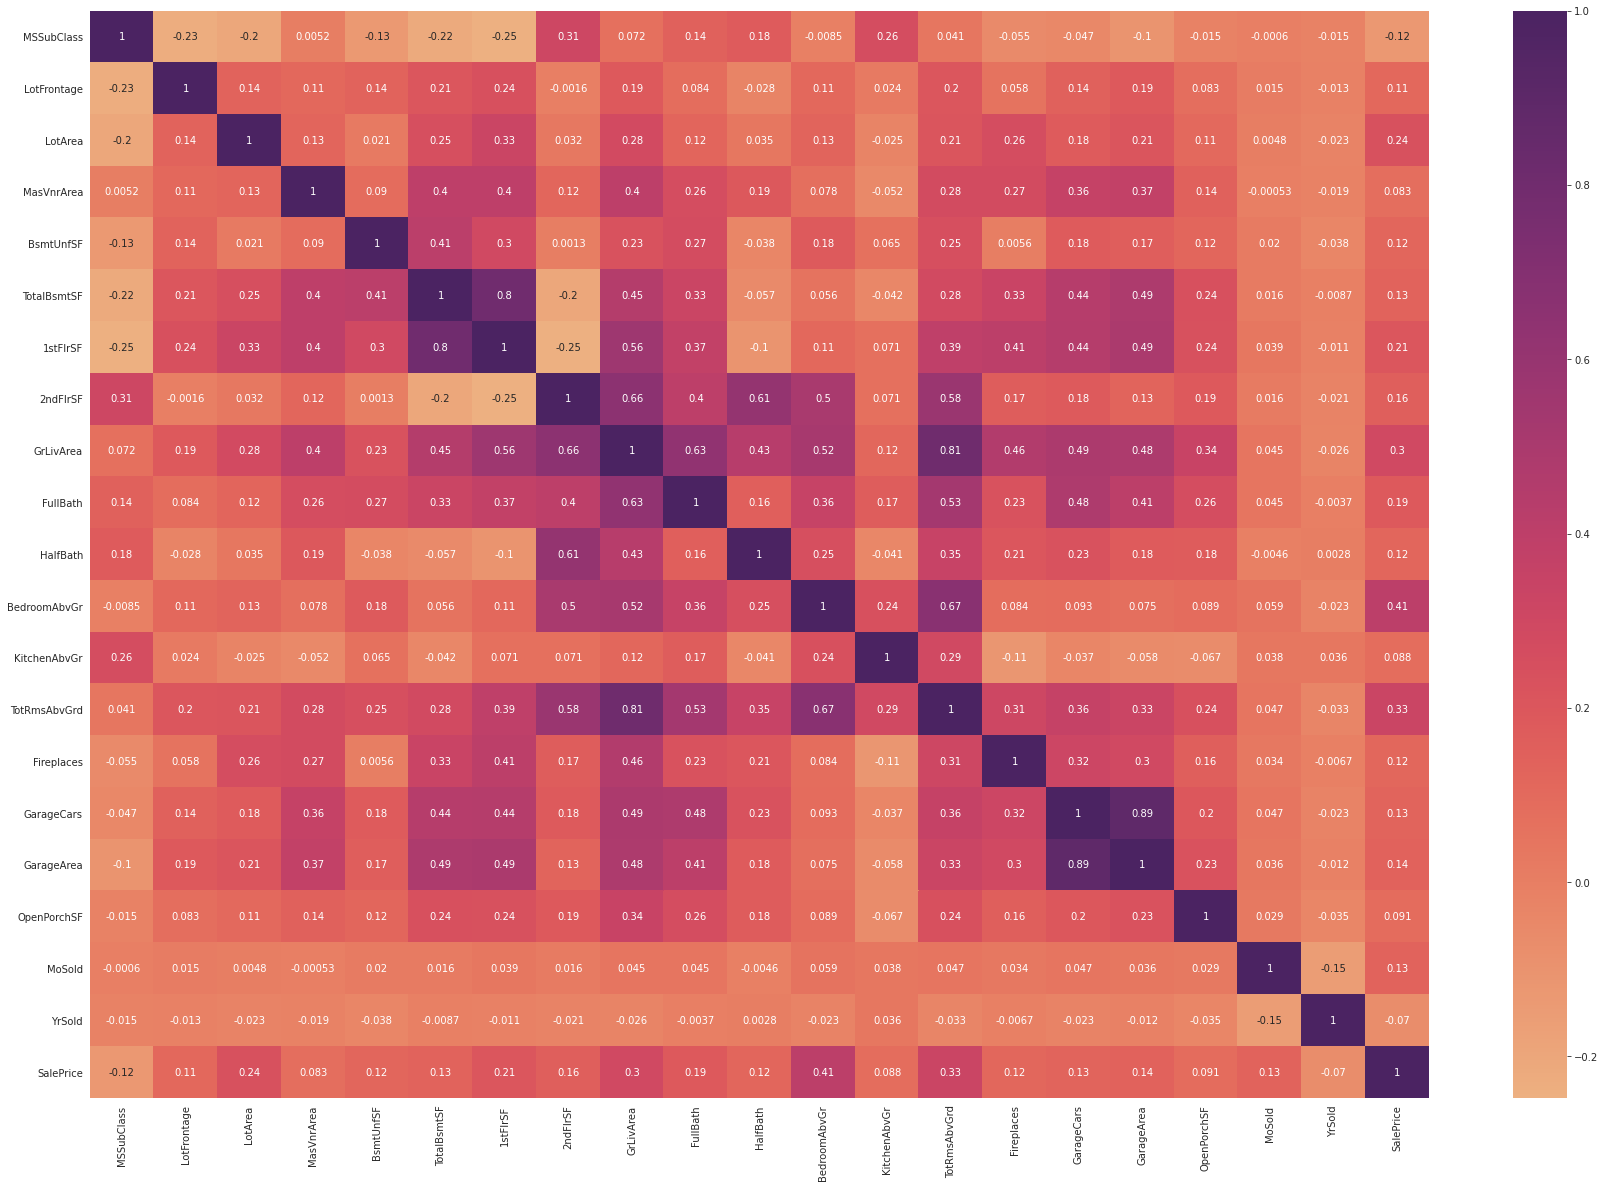

In [ ]:
corr_resumida = df_resumida.corr()
plt.figure(figsize = (30,20))
sns.heatmap(data = corr_resumida, annot=True, cmap='flare')

In [ ]:
# Novas variáveis

df_resumida["proporcao_construida"] = df_resumida["1stFlrSF"] / df_resumida["LotArea"]
df_resumida["proporcao_quartos"] = df_resumida['BedroomAbvGr'] / df_resumida['TotRmsAbvGrd']
df_resumida["tamanho_vagas"] = df_resumida['GarageArea'] / df_resumida['GarageCars']
df_resumida['propocao_porao_un'] = df_resumida['BsmtUnfSF'] / df_resumida['TotalBsmtSF']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

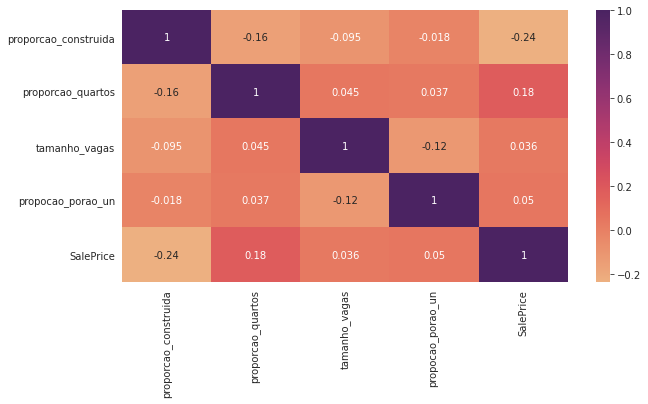

In [ ]:
novas_vars = df_resumida[["proporcao_construida","proporcao_quartos","tamanho_vagas","propocao_porao_un","SalePrice"]]
corr_novas_vars = novas_vars.corr()

plt.figure(figsize = (10,5))
sns.heatmap(data=corr_novas_vars, cmap = 'flare', annot = True)

In [ ]:
novas_vars.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


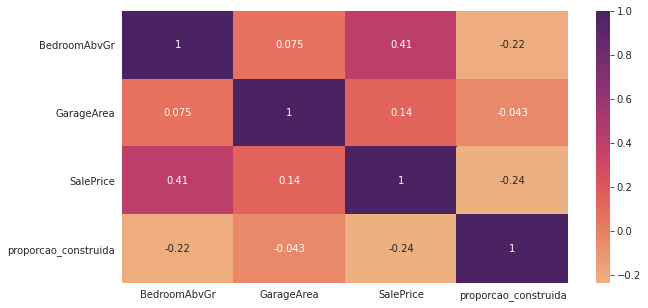

In [ ]:
df_teste1 = df_resumida[["BedroomAbvGr","GarageArea", "SalePrice"]]
df_teste1["proporcao_construida"] = df_resumida["proporcao_construida"]
corr_teste1 = df_teste1.corr()

plt.figure(figsize = (10,5))
sns.heatmap(data=corr_teste1, cmap = 'flare', annot = True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_LotArea = df_resumida[["LotArea","SalePrice"]]

X = X_LotArea.drop(columns = 'SalePrice', axis = 1)
y = X_LotArea["SalePrice"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.7, random_state = 99)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

r2 = modelo.score(X_train, y_train)
r2

0.04650061853634868

In [ ]:
X_MSubClass = df_resumida[["MSSubClass","SalePrice"]]

X = X_MSubClass.drop(columns = 'SalePrice', axis = 1)
y = X_MSubClass["SalePrice"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.7, random_state = 99)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

r2 = modelo.score(X_train, y_train)
r2

0.02460849071474691

In [ ]:
X_LotFrontage = df_resumida[["LotFrontage","SalePrice"]]
X = X_LotFrontage.drop(columns = 'SalePrice', axis = 1)
y = X_LotFrontage["SalePrice"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.7, random_state = 99)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

r2 = modelo.score(X_train, y_train)
r2

0.01262480736431526

In [ ]:
X_BedroomAbvGr = df_resumida[["BedroomAbvGr","SalePrice"]]

X = X_BedroomAbvGr.drop(columns = 'SalePrice', axis = 1)
y = X_BedroomAbvGr["SalePrice"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.7, random_state = 99)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

r2 = modelo.score(X_train, y_train)
r2

0.16542404462234483

In [ ]:
X_FullBath = df_resumida[["FullBath","SalePrice"]]

X = X_FullBath.drop(columns = 'SalePrice', axis = 1)
y = X_FullBath["SalePrice"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.7, random_state = 99)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

r2 = modelo.score(X_train, y_train)
r2

0.026174931388346034

In [ ]:
X_teste1 = df_resumida[["BedroomAbvGr","LotArea","SalePrice"]]

X = X_teste1.drop(columns = 'SalePrice', axis = 1)
y = X_teste1["SalePrice"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.7, random_state = 99)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

r2 = modelo.score(X_train, y_train)
r2

0.1925869152034102

In [ ]:
X_GarageArea = df_resumida[["GarageArea","SalePrice"]]

X = X_GarageArea.drop(columns = 'SalePrice', axis = 1)
y = X_GarageArea["SalePrice"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.7, random_state = 99)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

r2 = modelo.score(X_train, y_train)
r2

0.03622494710497315

In [ ]:
X_teste2 = df_resumida[["BedroomAbvGr","LotArea","GarageArea","SalePrice"]]
X = X_teste2.drop(columns = 'SalePrice', axis = 1)
y = X_teste2["SalePrice"]

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.7, random_state = 99)
modelo = LinearRegression()
modelo.fit(X_train, y_train)

r2 = modelo.score(X_train, y_train)
r2

0.2039997661672246

In [ ]:
X_MSubClass = df_resumida["MSSubClass"]
X_LotFrontage = df_resumida["LotFrontage"]
X_LotArea = df_resumida["LotArea"]
X_MasVnrArea = df_resumida["MasVnrArea"]
X_BsmtUnfF = df_resumida["BsmtUnfSF"]
X_TotalBsmtSF = df_resumida["TotalBsmtSF"]
X_1stFlrSF = df_resumida["1stFlrSF"]
X_2ndFlrSF = df_resumida["2ndFlrSF"]
X_GrLivArea = df_resumida["GrLivArea"]
X_FullBath = df_resumida["FullBath"]
X_HalfBath = df_resumida["HalfBath"]
X_BedroomAbvGr = df_resumida["BedroomAbvGr"]
X_KitchenAbvGr = df_resumida["KitchenAbvGr"]
X_TotRmsAbvGrd = df_resumida["TotRmsAbvGrd"]
X_Fireplaces = df_resumida["Fireplaces"]
X_GarageCars = df_resumida["GarageCars"]
X_GarageArea = df_resumida["GarageArea"]
X_OpenPorchSF = df_resumida["OpenPorchSF"]
X_MoSold = df_resumida["MoSold"]
X_YrSold = df_resumida["YrSold"]